## Setup

In [1]:
# use full window width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import numpy as np
os.chdir('..')
import virl
from matplotlib import pyplot as plt

import pandas as pd
from IPython import display


def smooth_plot(all_rewards, smoothed_rewards,title): 
    plt.figure(2, figsize=(12, 6))
    plt.clf()
    plt.title(title)
    plt.xlabel("Epsiode") 
    plt.ylabel("Total Reward")
    plt.plot(all_rewards, '--', alpha=0.5) 
    plt.plot(smoothed_rewards) 
    plt.legend(["Rewards", "Rewards (Smoothed)"]) 
    
   # display.clear_output(wait=True)

## Agent Implementation

In [2]:
# class QTable:
#     def __init__(self, initial, num_of_actions):
#         self.q_table = {}
#         self.initial = initial
#         self.num_of_actions = num_of_actions
    
#     def get_actions(self, state):
#         state_tuple = tuple(state)
#         return self.q_table.get(state_tuple, [self.initial]*self.num_of_actions)
    
#     def get_action_value(self, state, action_index):
#         state_tuple = tuple(state)
#         return self.q_table.get(state_tuple, [self.initial]*self.num_of_actions)[action_index]
    
#     def set_action_value(self, state, action_index, action_value):
#         if not tuple(state) in self.q_table:
#             self.q_table[tuple(state)] = [self.initial]*self.num_of_actions
#         self.q_table[tuple(state)][action_index] = action_value 

# class QLearningAgent:

#     def __init__(self, env):
#         self.num_of_actions = env.action_space.n
#         self.env = env

#         self.q_table = QTable(initial=0, num_of_actions=self.num_of_actions) 
        
#         # hyper parameters
#         self.discount = 0.99 # gamma
#         self.learning_rate = 0.25 # step size, alpha
#         self.episodes = 1500
#         self.print_out_every_x_episodes = int(self.episodes/50)
        
#         # hyper parameters for epsilon
#         self.initial_epsilon = 1 # initial
#         self.decrease_factor = (1/self.episodes)/1.25 # epsilon
#         self.decrease_factor = 0.00075
        
#         # hyper parameters for discretising state data
#         self.highest = 600000000
#         self.lowest = 0
#         self.number_bins = 20
        
#         print("Hyperparameter dump")
#         print("----")
#         print("Number Of Episodes = " + str(self.episodes))
#         print("Print out every " + str(self.print_out_every_x_episodes) + " episodes")
#         print("Learning Rate = " + str(self.learning_rate))
#         print("Discount = " + str(self.discount))
#         print("----")
#         print("Initial Epsilon = " + str(self.initial_epsilon))
#         print("Epsilon Decrease Factor = " + str(self.decrease_factor))
#         print("----")
#         print("Number of Bins to Discretise State = " + str(self.number_bins))
#         print("----")
        
#     def continous_to_discrete(self,continous_state):
#         bins = np.linspace(self.lowest,self.highest,num=self.number_bins)
#         discrete = np.digitize(continous_state,bins)
#         return discrete
    
    
#     def train(self):
#         states,all_rewards, all_total_rewards = self.run_all_episodes("Training")
#         return states,all_rewards, all_total_rewards

    
#     def evaluate(self,episodes=100):
#         self.episodes = episodes
#         self.epsilon = -1000
#         states,all_rewards, all_total_rewards = self.run_all_episodes("Evaluation")
#         return states,all_rewards, all_total_rewards
    
    
#     def run_all_episodes(self,title):
#         all_total_rewards = []
#         all_rewards = []
#         all_q_table_exploits = []
#         epislon = self.initial_epsilon # at the start only explore
        
#         for episode in range(1, self.episodes + 1):
#             rewards, exploited_q_table, states= self.run_episode(epislon)
#             total_reward = np.sum(rewards)

# #             if episode % self.print_out_every_x_episodes == 0:
# #                 print("Episode number: " + str(episode) + ". Total reward in episode: " + str(total_reward) + ". Episode executed with epsilon = " + str(epislon))
# #                 print("Average total reward in last " + str(self.print_out_every_x_episodes) + " episodes: " + str(np.mean(all_rewards[-self.print_out_every_x_episodes:])))
# #                 print("Average number of times we exploited q table in last " + str(self.print_out_every_x_episodes) + " episodes: " + str(np.mean(all_q_table_exploits[-self.print_out_every_x_episodes:])))
# #                 print("-----")
#             all_total_rewards.append(total_reward)
#             all_rewards.append(rewards)
#             all_q_table_exploits.append(exploited_q_table)
#             epislon -= self.decrease_factor #hyperparameter
        
#         #graph with orange smoothed reward
#         window_size = int(self.episodes/10)
#         smoothed_rewards = pd.Series(all_total_rewards).rolling(window_size, min_periods=window_size).mean() 
#         this_smoothed_reward = smoothed_rewards.values[-1]
#         smooth_plot(all_total_rewards, smoothed_rewards,title)
#         return states,all_rewards, all_total_rewards
    
#     def run_episode(self,epislon):
#         rewards = []
#         states = []
#         done = False
        
#         state = self.env.reset()
#         states.append(state)
#         state = self.continous_to_discrete(state)
        
#         exploited_q_table = 0
        
#         while not done:
#             random_number = np.random.random()
#             if random_number < epislon:
#                 #explore
#                 action = np.random.choice(self.num_of_actions)
#             else:
#                 #exploit
#                 action = self.get_action(state)
#                 exploited_q_table+=1
                
#             new_state, reward, done, i = self.env.step(action=action) # Q-learning
#             states.append(new_state)

#             new_state = self.continous_to_discrete(new_state)
            
#             #update q table
#             self.update_q_table(state,new_state,action,reward)
            
#             rewards.append(reward)
#             state = new_state
#         return (rewards, exploited_q_table, states)
    
#     def update_q_table(self,state,new_state,action,reward):
#         #target
#         #max of a' given the 
#         max_a_prime = np.max(self.q_table.get_actions(new_state))
#         target = reward + (self.discount*max_a_prime)
        
#         #compute difference
#         action_value = self.q_table.get_action_value(state,action)
#         difference = target - action_value
        
#         #take a small step in the delta direction
#         new_q = action_value + (self.learning_rate * difference)
        
#         self.q_table.set_action_value(state,action,new_q)
        
    
#     def get_action(self,state):
#         #exploit the q table
#         actions = self.q_table.get_actions(state)
#         action = np.argmax(self.q_table.get_actions(state))
#         return action

In [ ]:
from QLearningAgent import QLearningAgent,QTable

## Train

In [3]:
from plot_helper import plot

Problem id: 0

Hyperparameter dump
----
Number Of Episodes = 1500
Print out every 30 episodes
Learning Rate = 0.25
Discount = 0.99
----
Initial Epsilon = 1
Epsilon Decrease Factor = 0.00075
----
Number of Bins to Discretise State = 20
----
Train
Evaluate
Problem id: 1

Hyperparameter dump
----
Number Of Episodes = 1500
Print out every 30 episodes
Learning Rate = 0.25
Discount = 0.99
----
Initial Epsilon = 1
Epsilon Decrease Factor = 0.00075
----
Number of Bins to Discretise State = 20
----
Train
Evaluate
Problem id: 2

Hyperparameter dump
----
Number Of Episodes = 1500
Print out every 30 episodes
Learning Rate = 0.25
Discount = 0.99
----
Initial Epsilon = 1
Epsilon Decrease Factor = 0.00075
----
Number of Bins to Discretise State = 20
----
Train
Evaluate
Problem id: 3

Hyperparameter dump
----
Number Of Episodes = 1500
Print out every 30 episodes
Learning Rate = 0.25
Discount = 0.99
----
Initial Epsilon = 1
Epsilon Decrease Factor = 0.00075
----
Number of Bins to Discretise State = 20


C:\Users\chozo\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


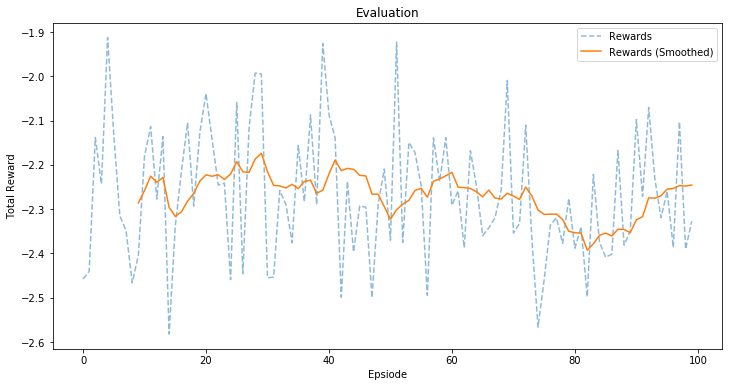

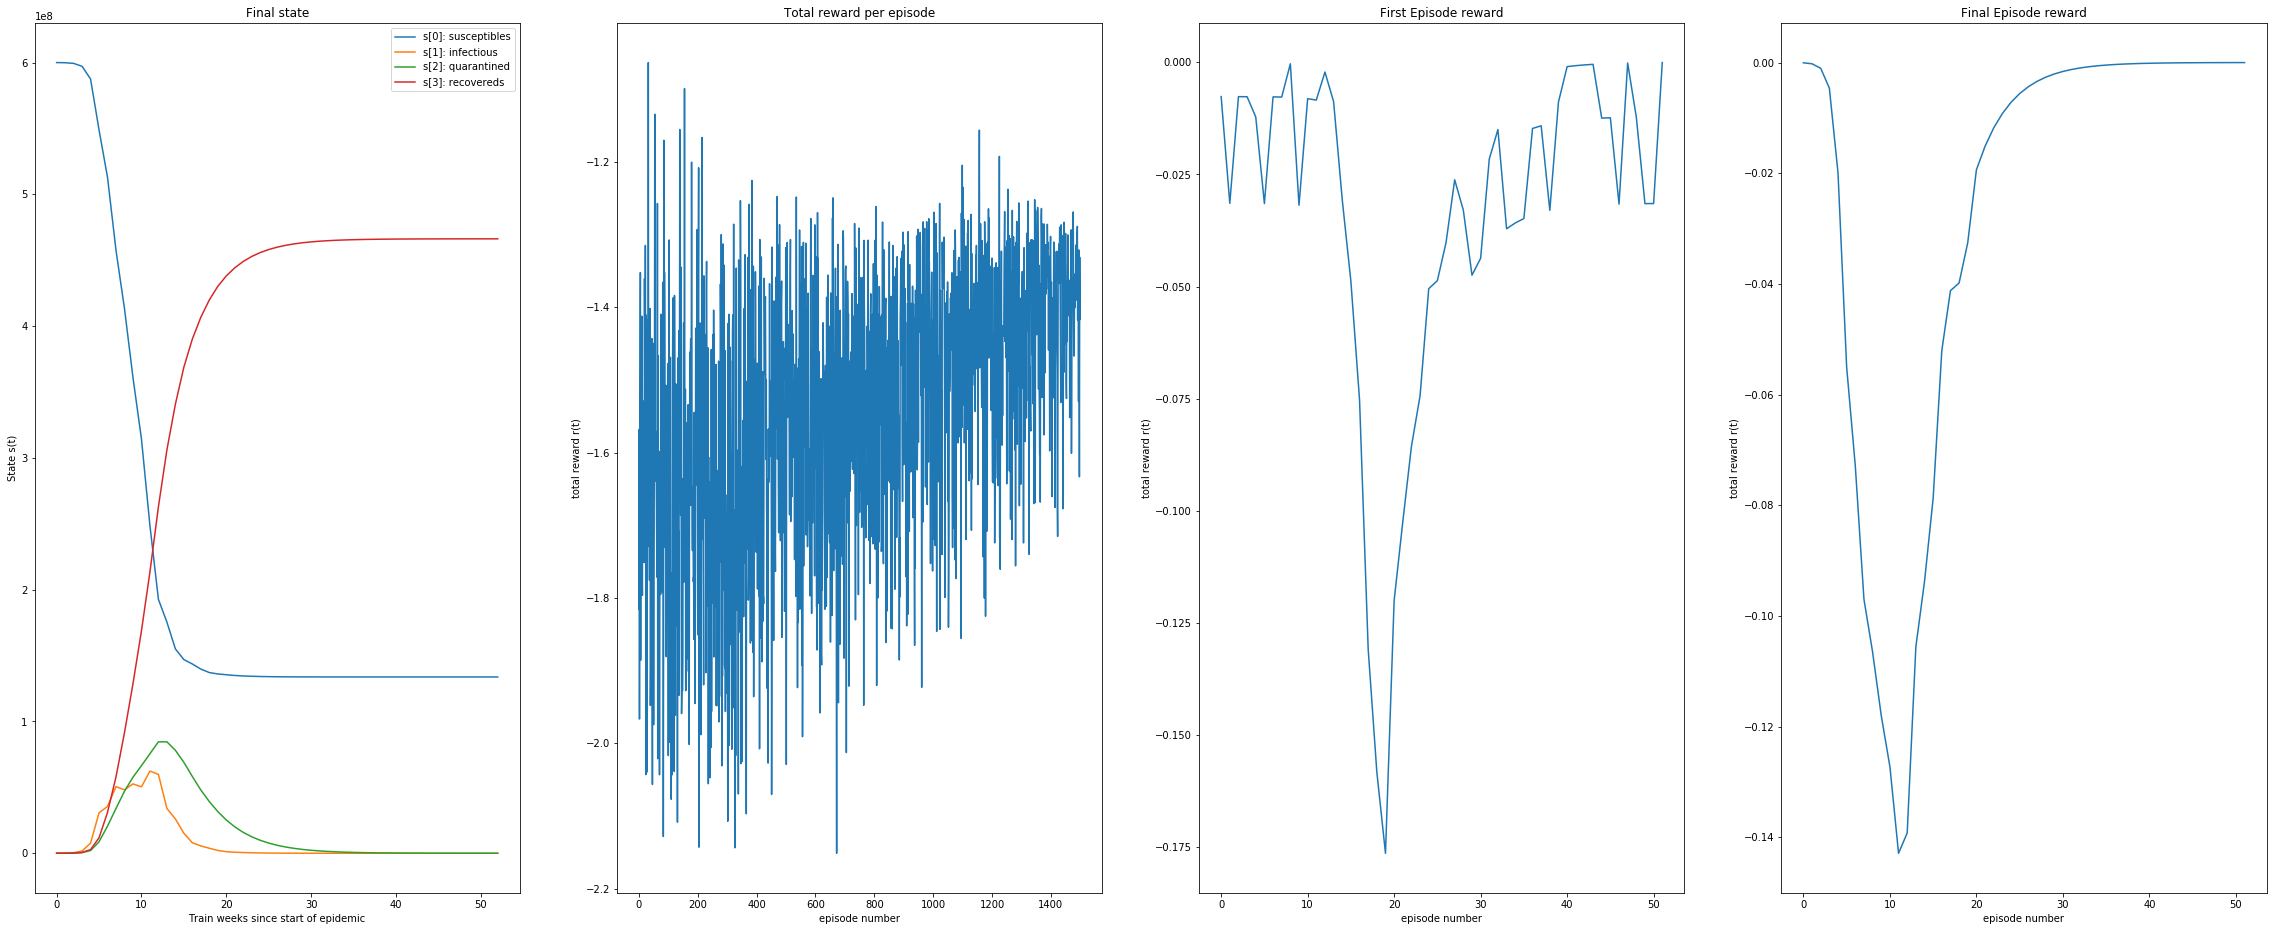

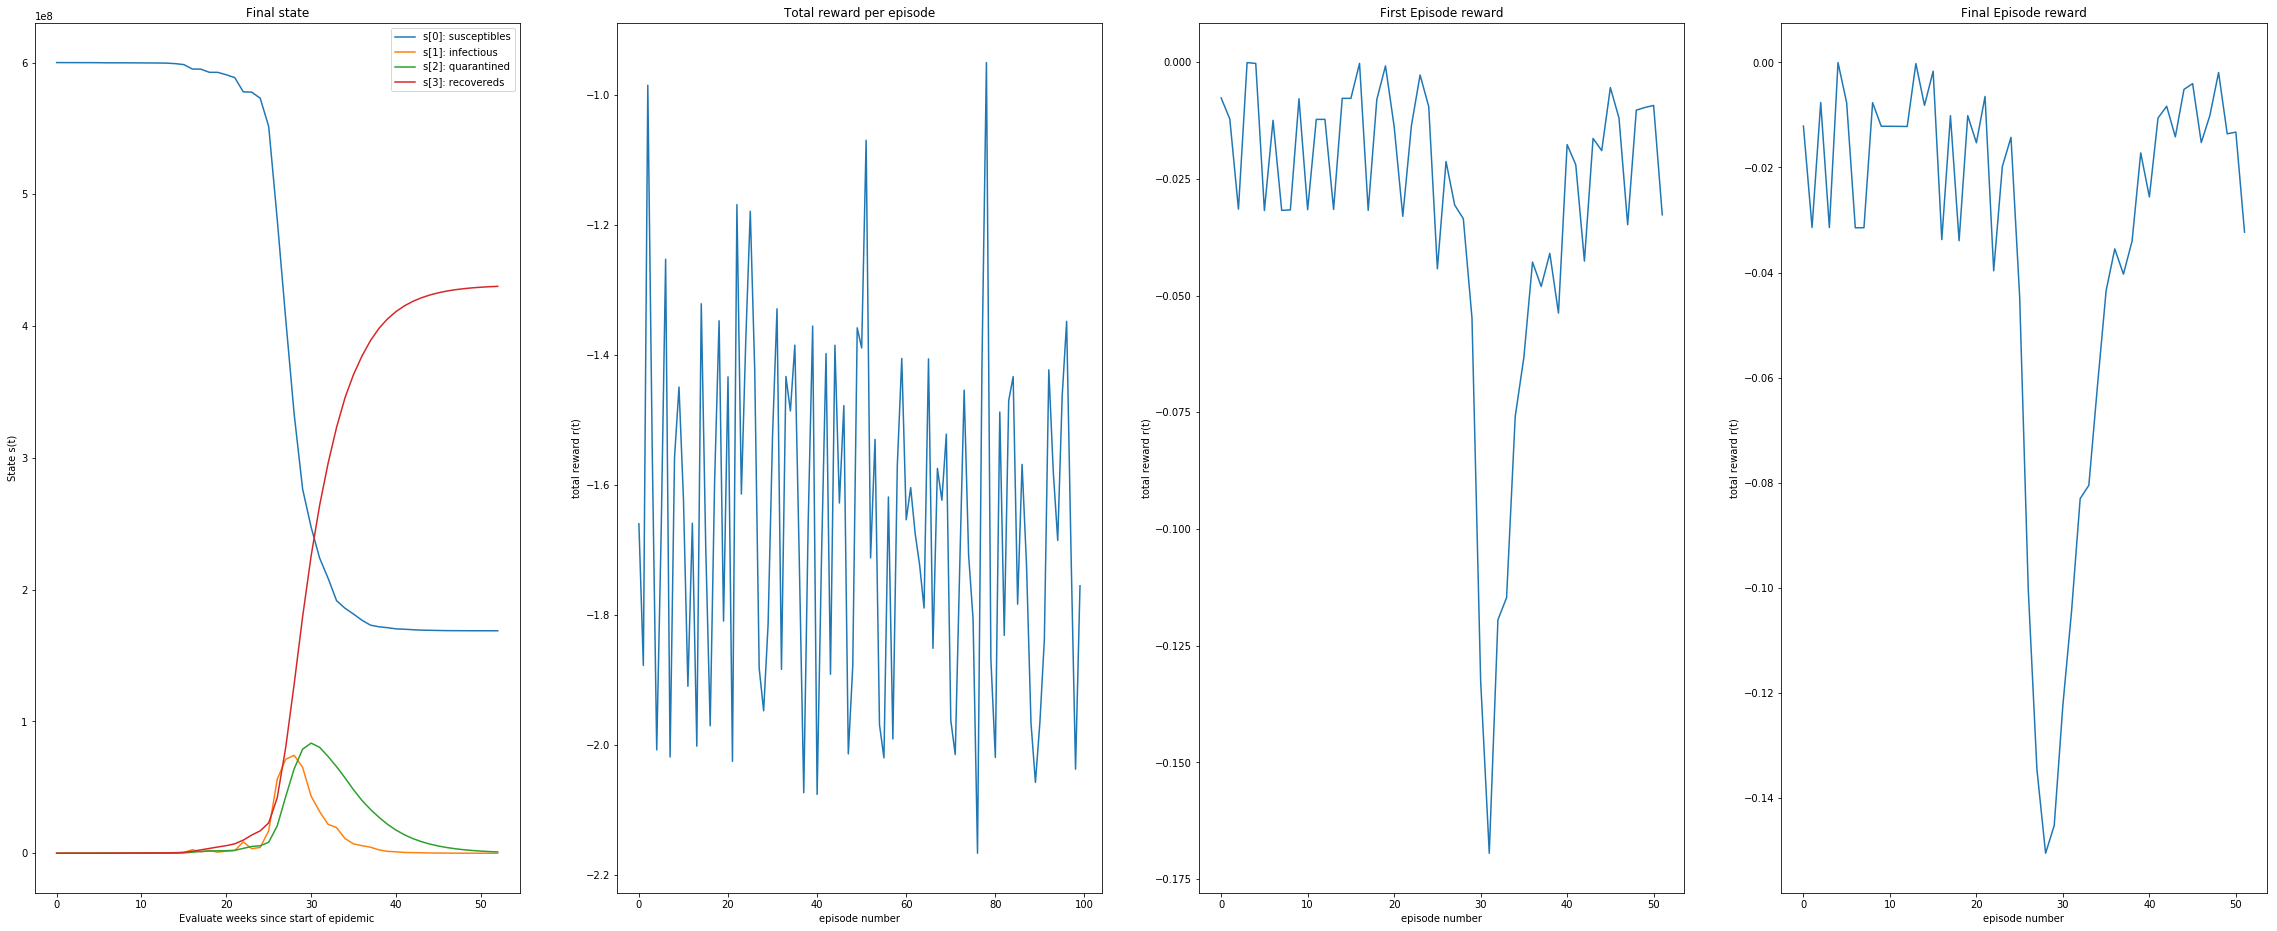

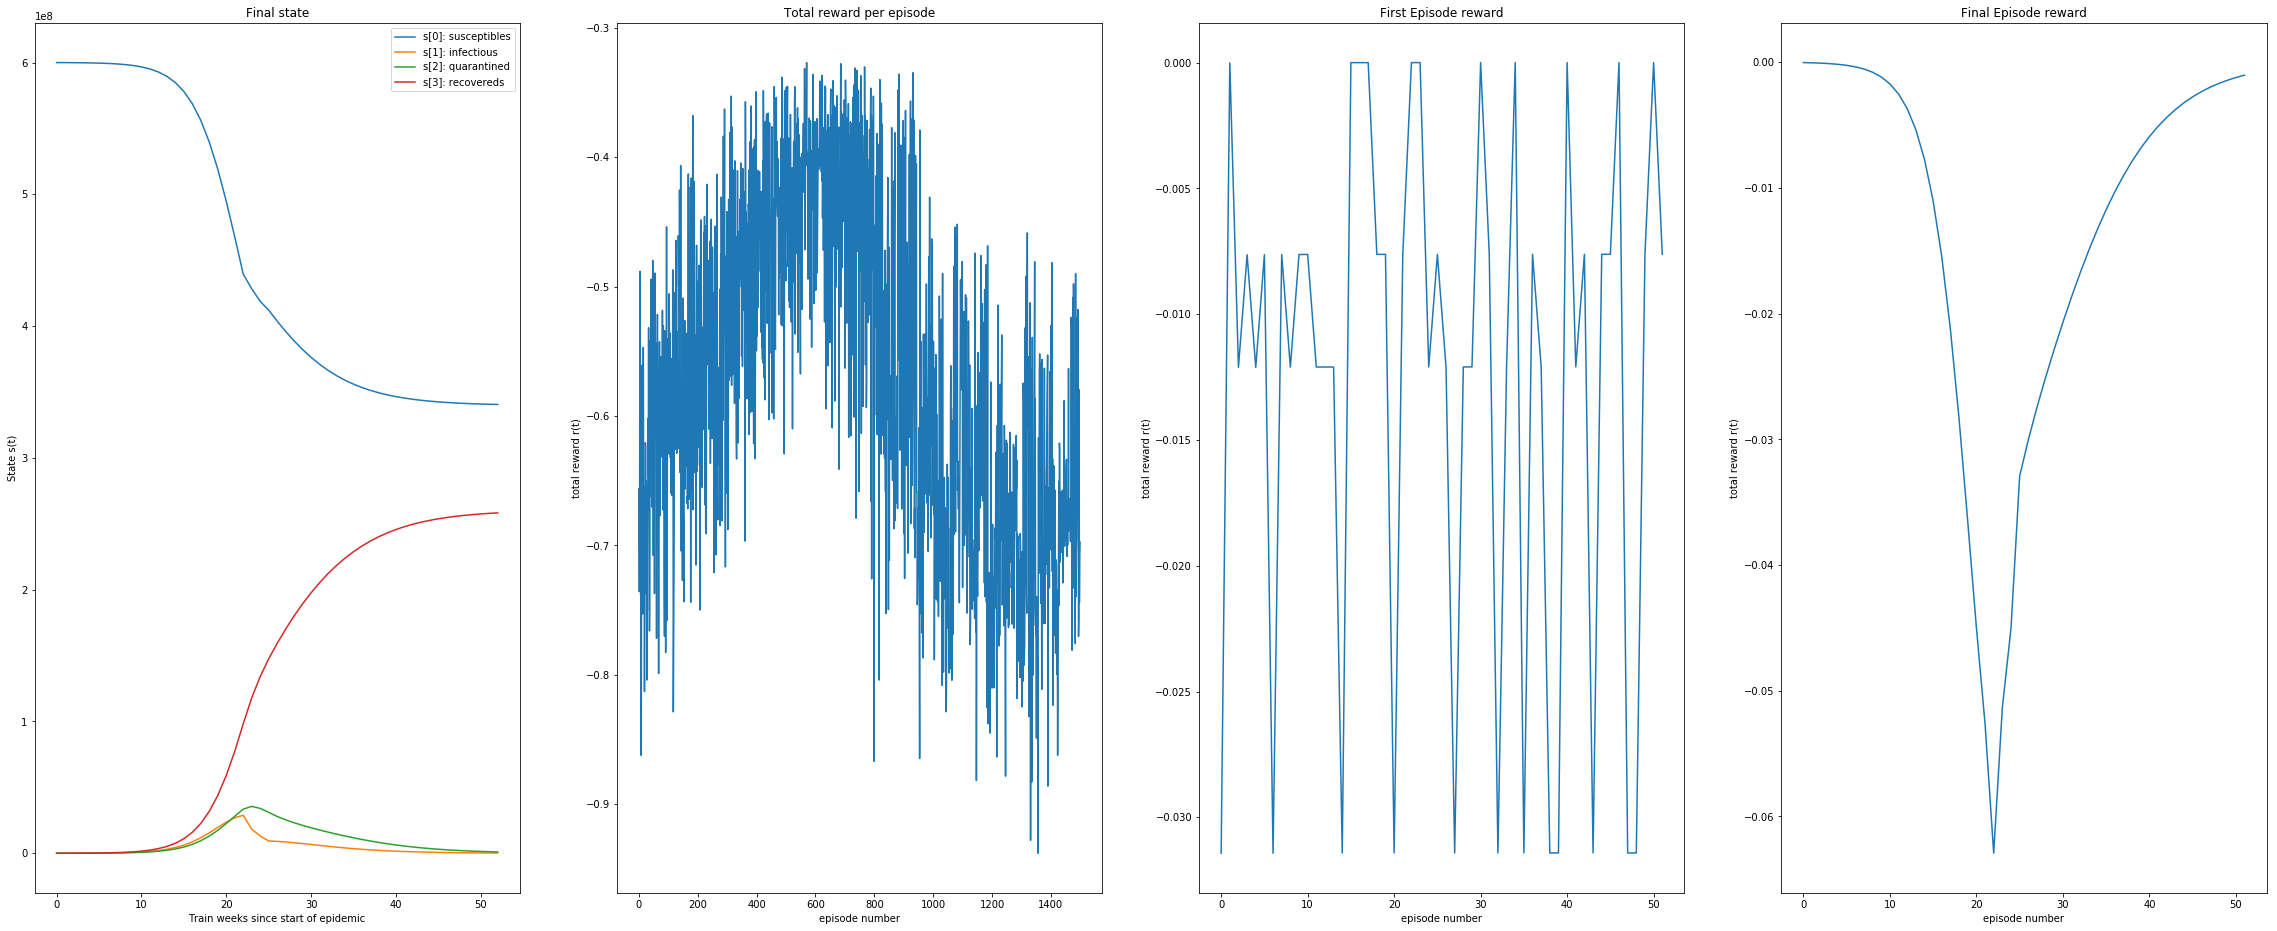

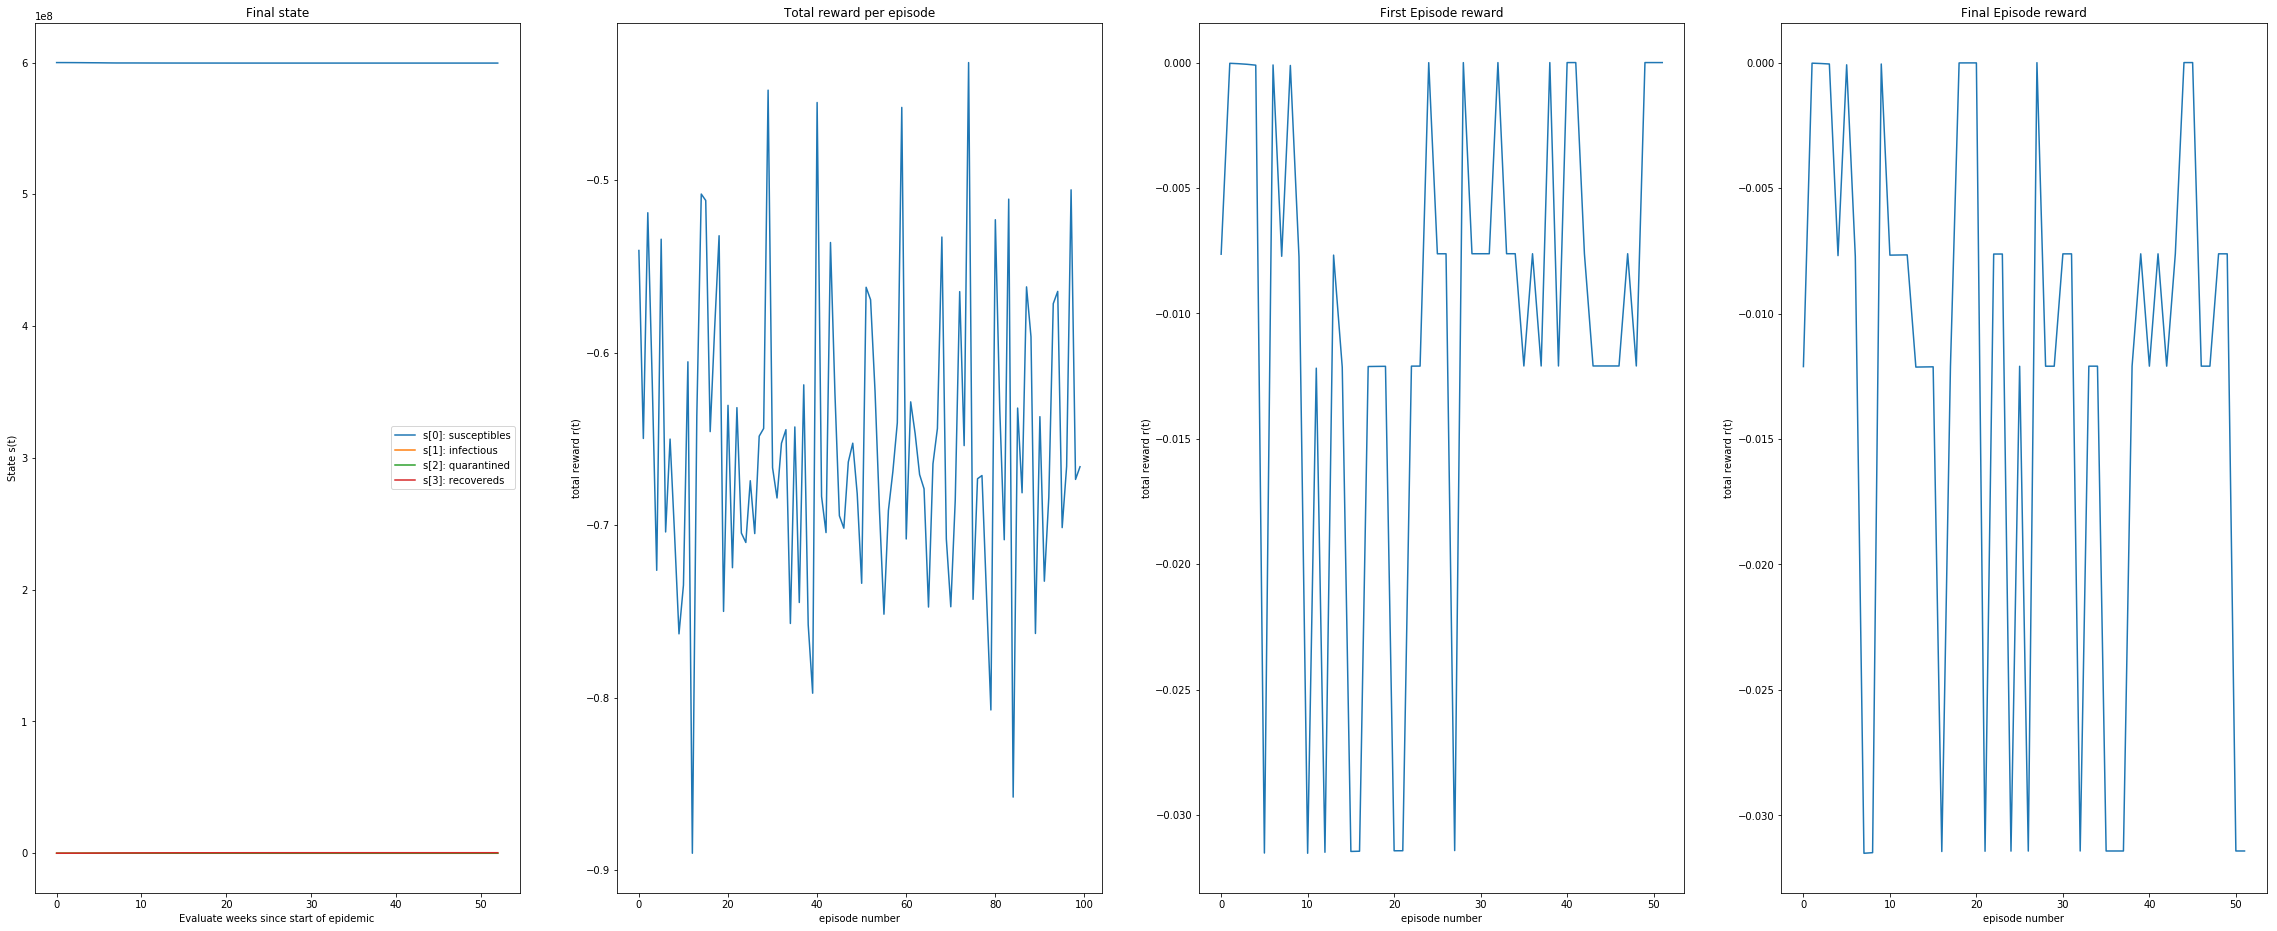

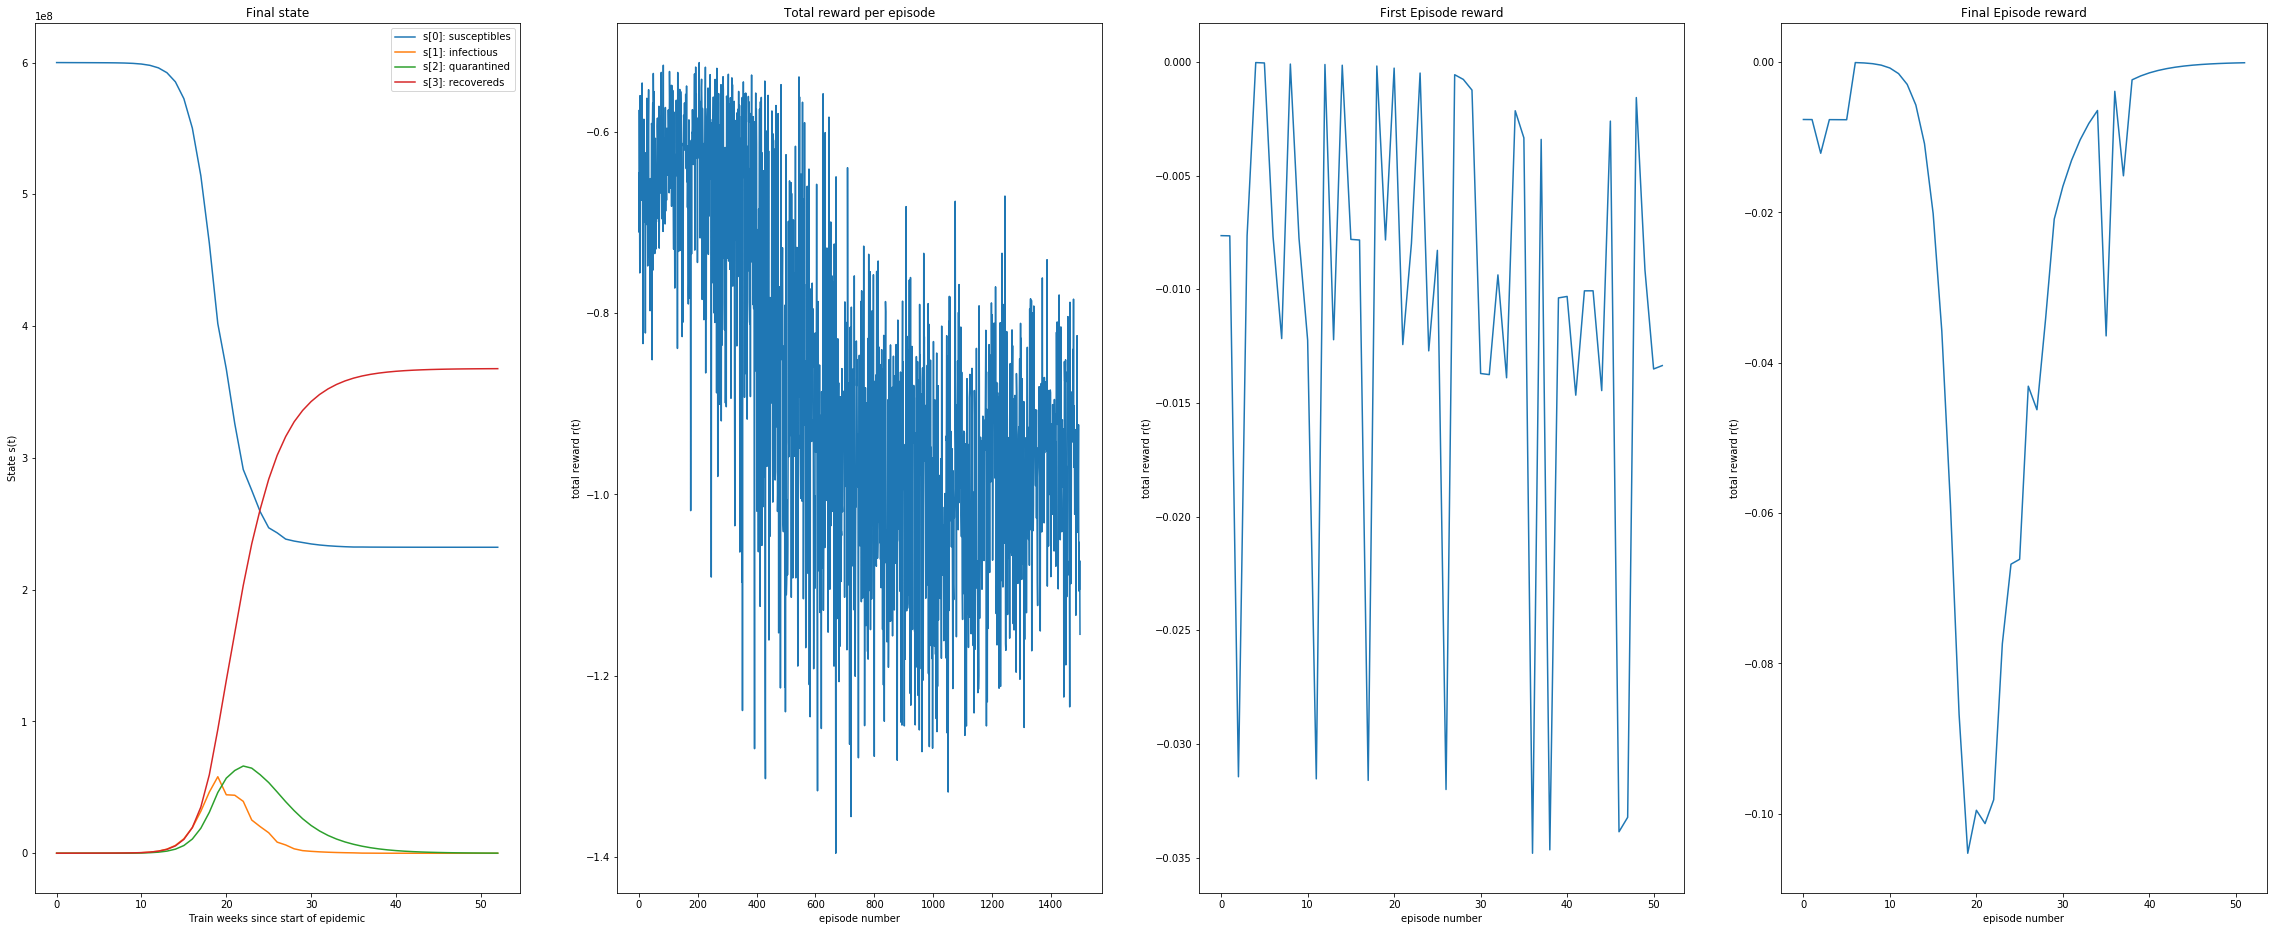

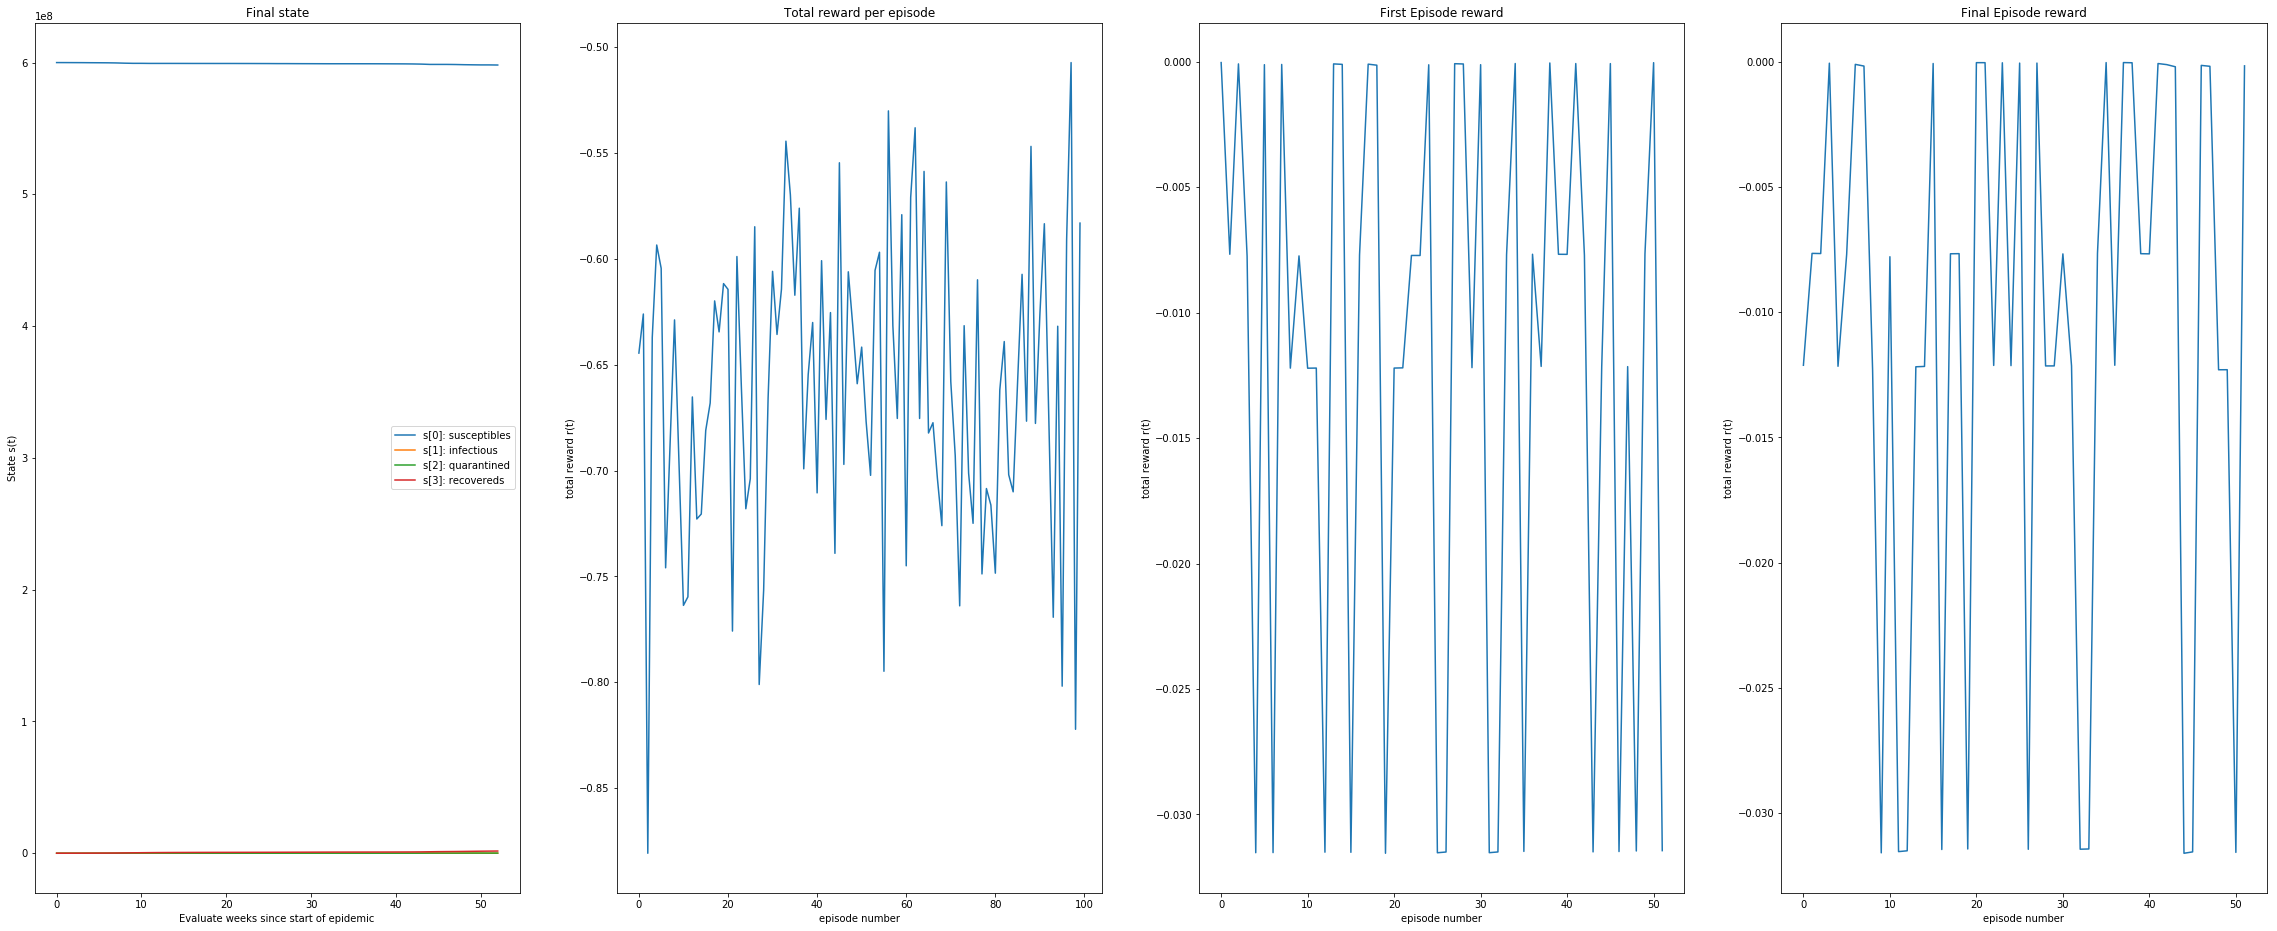

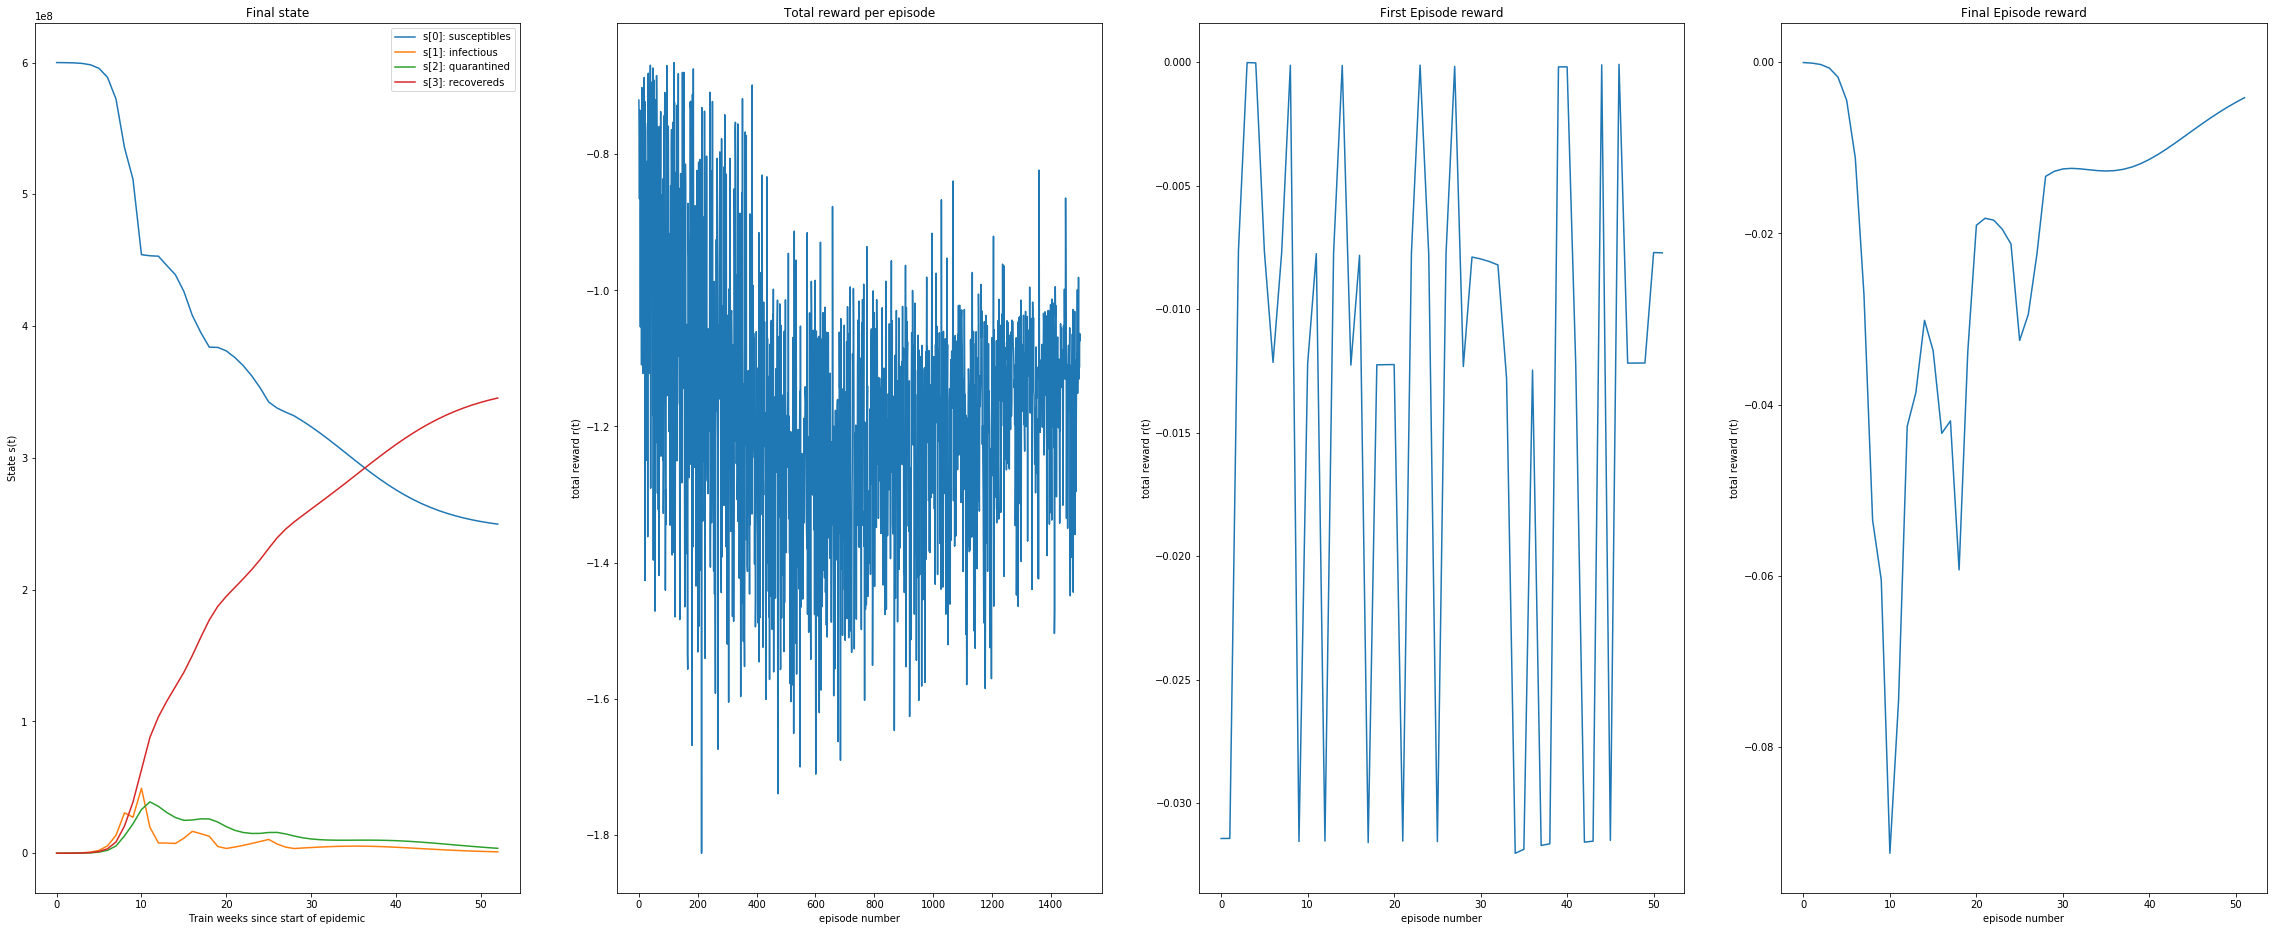

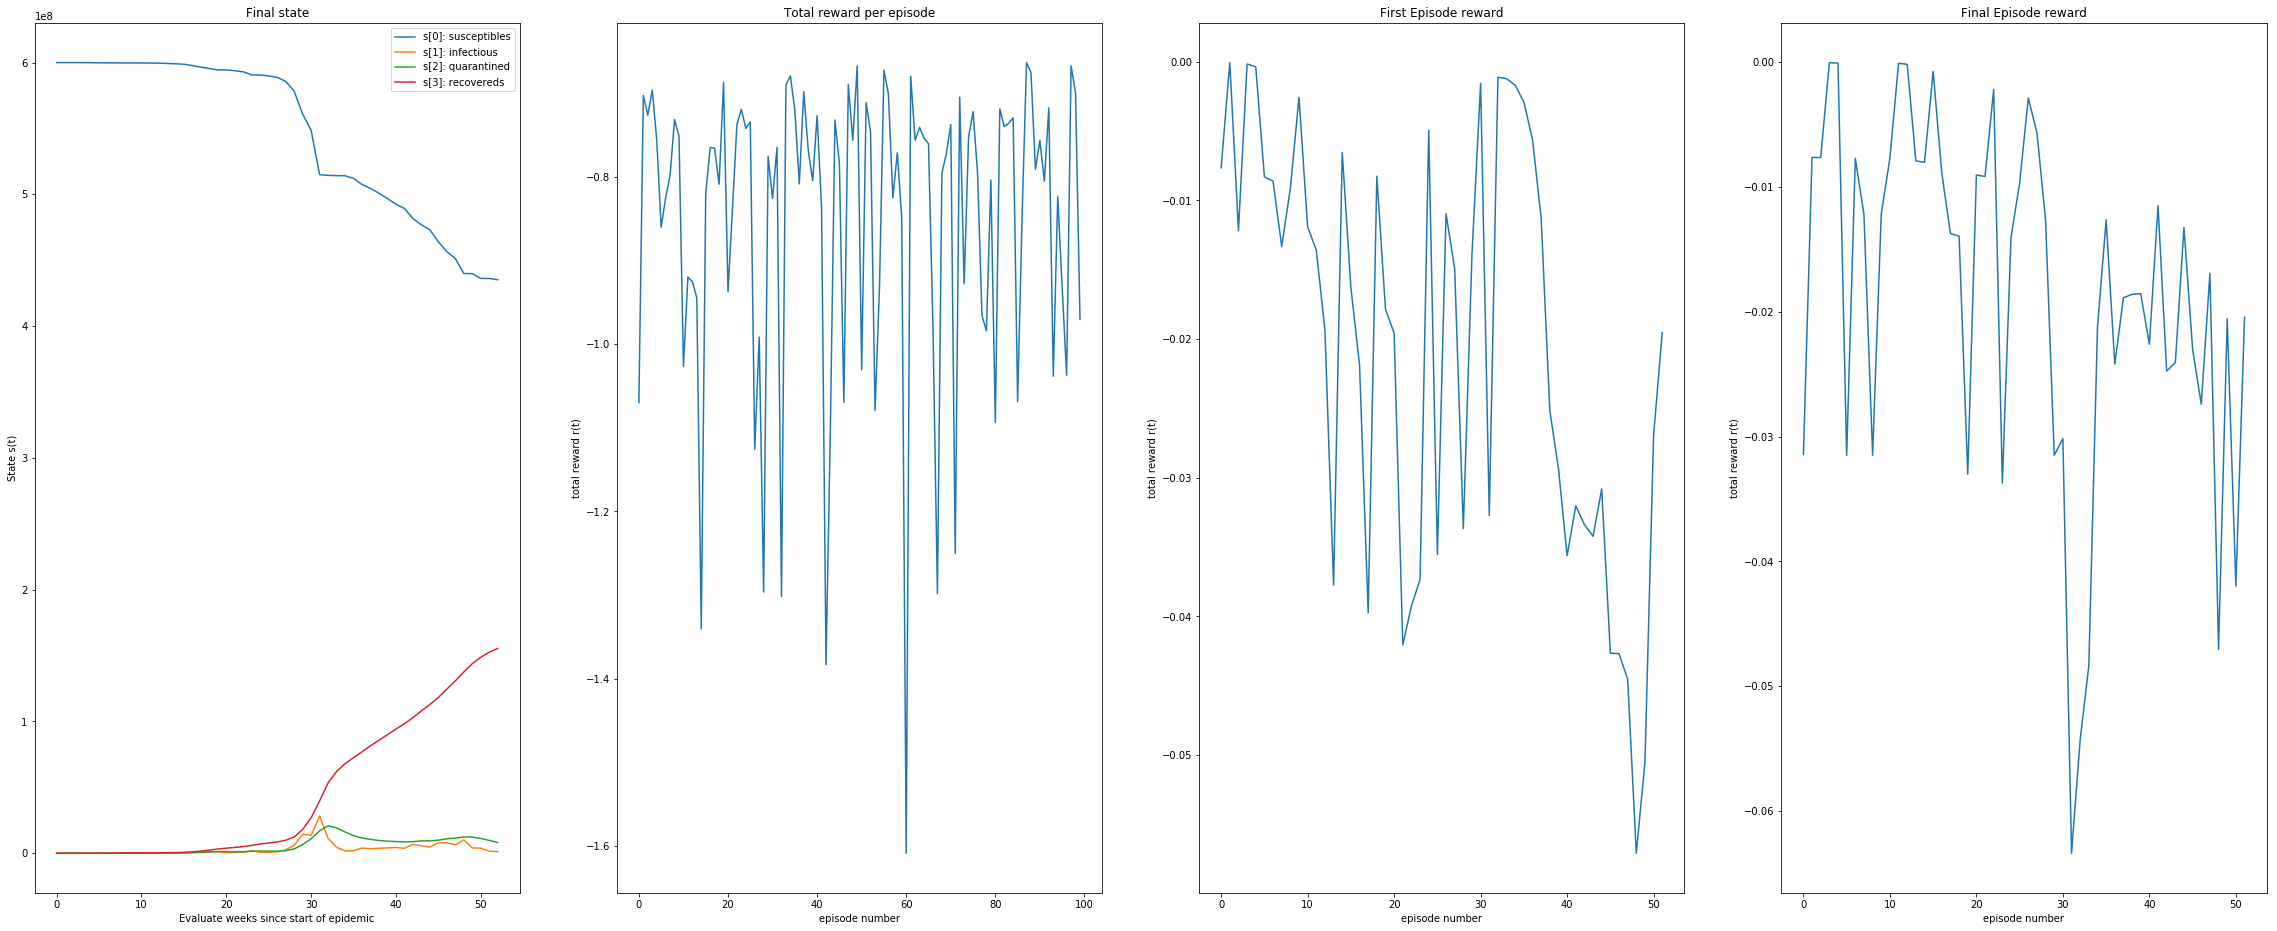

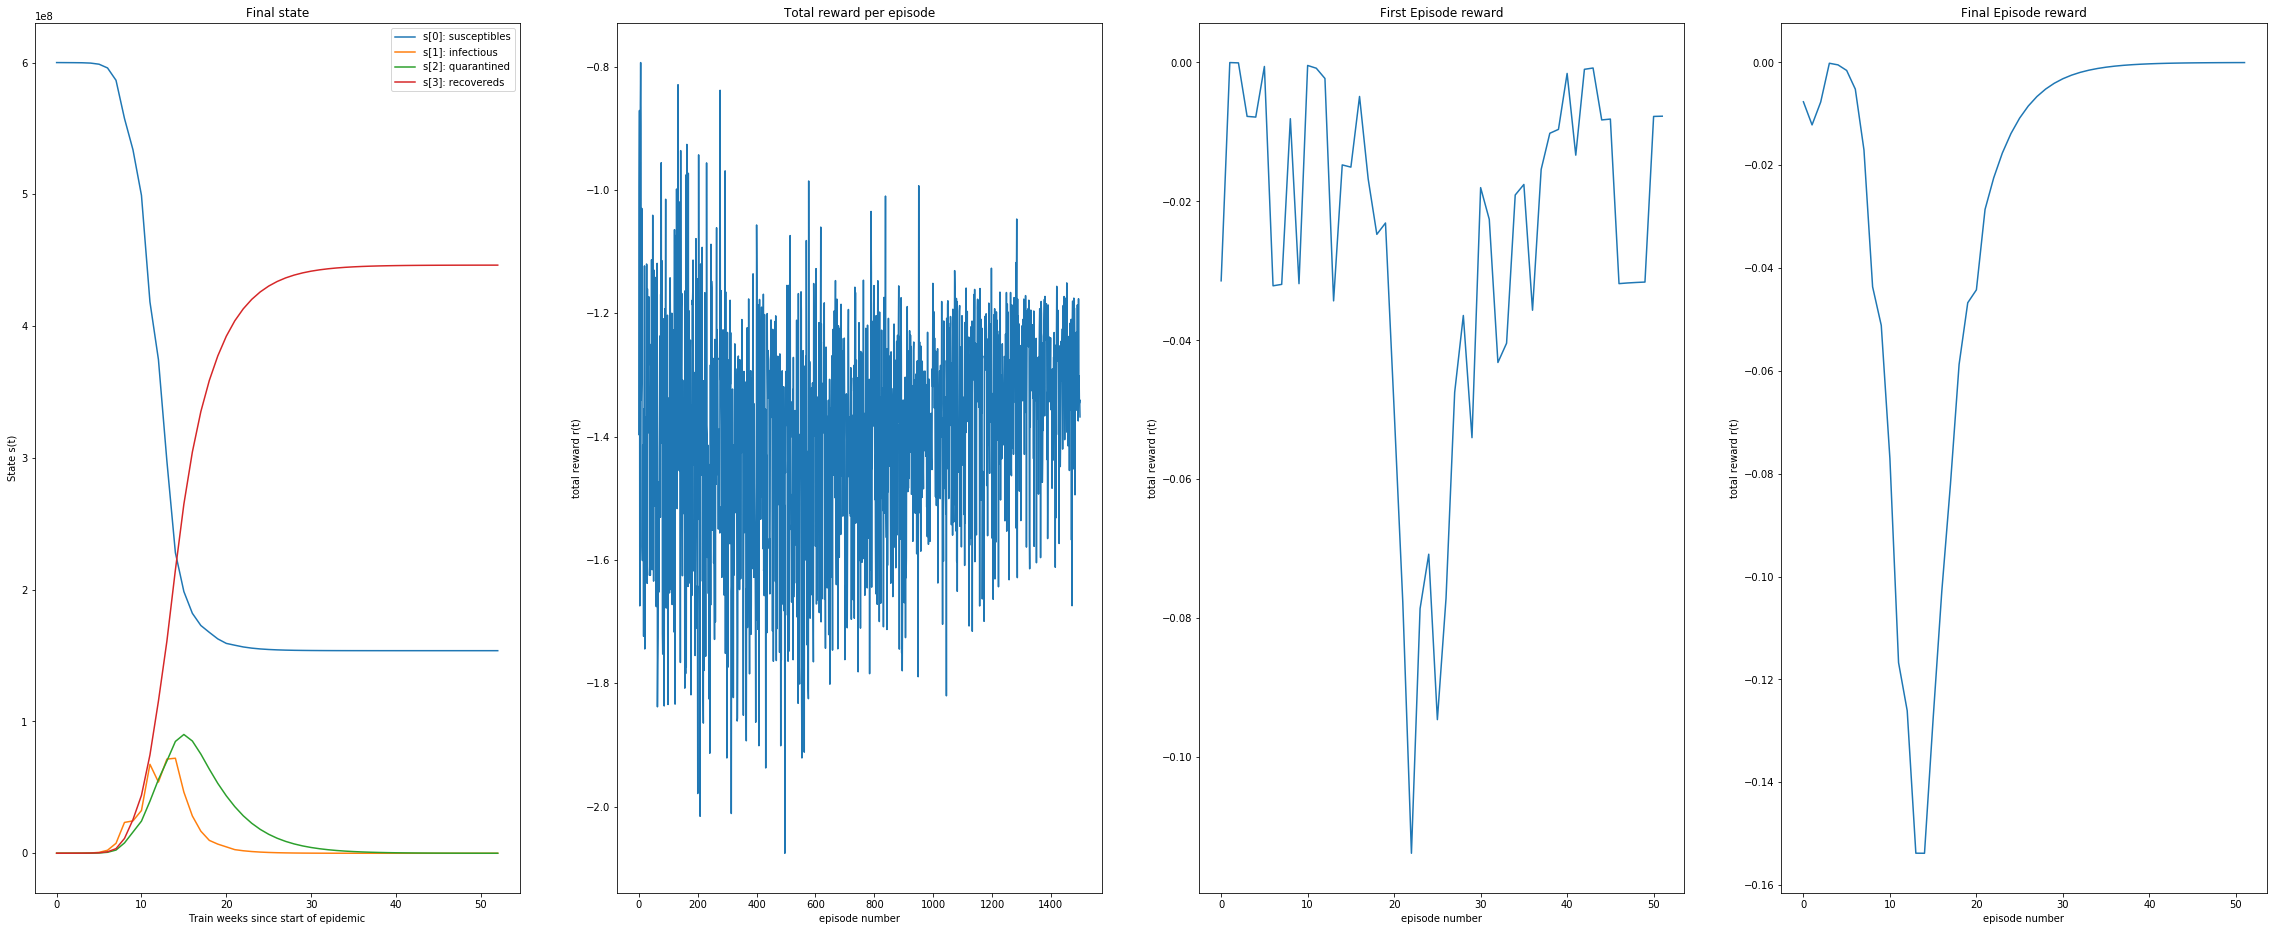

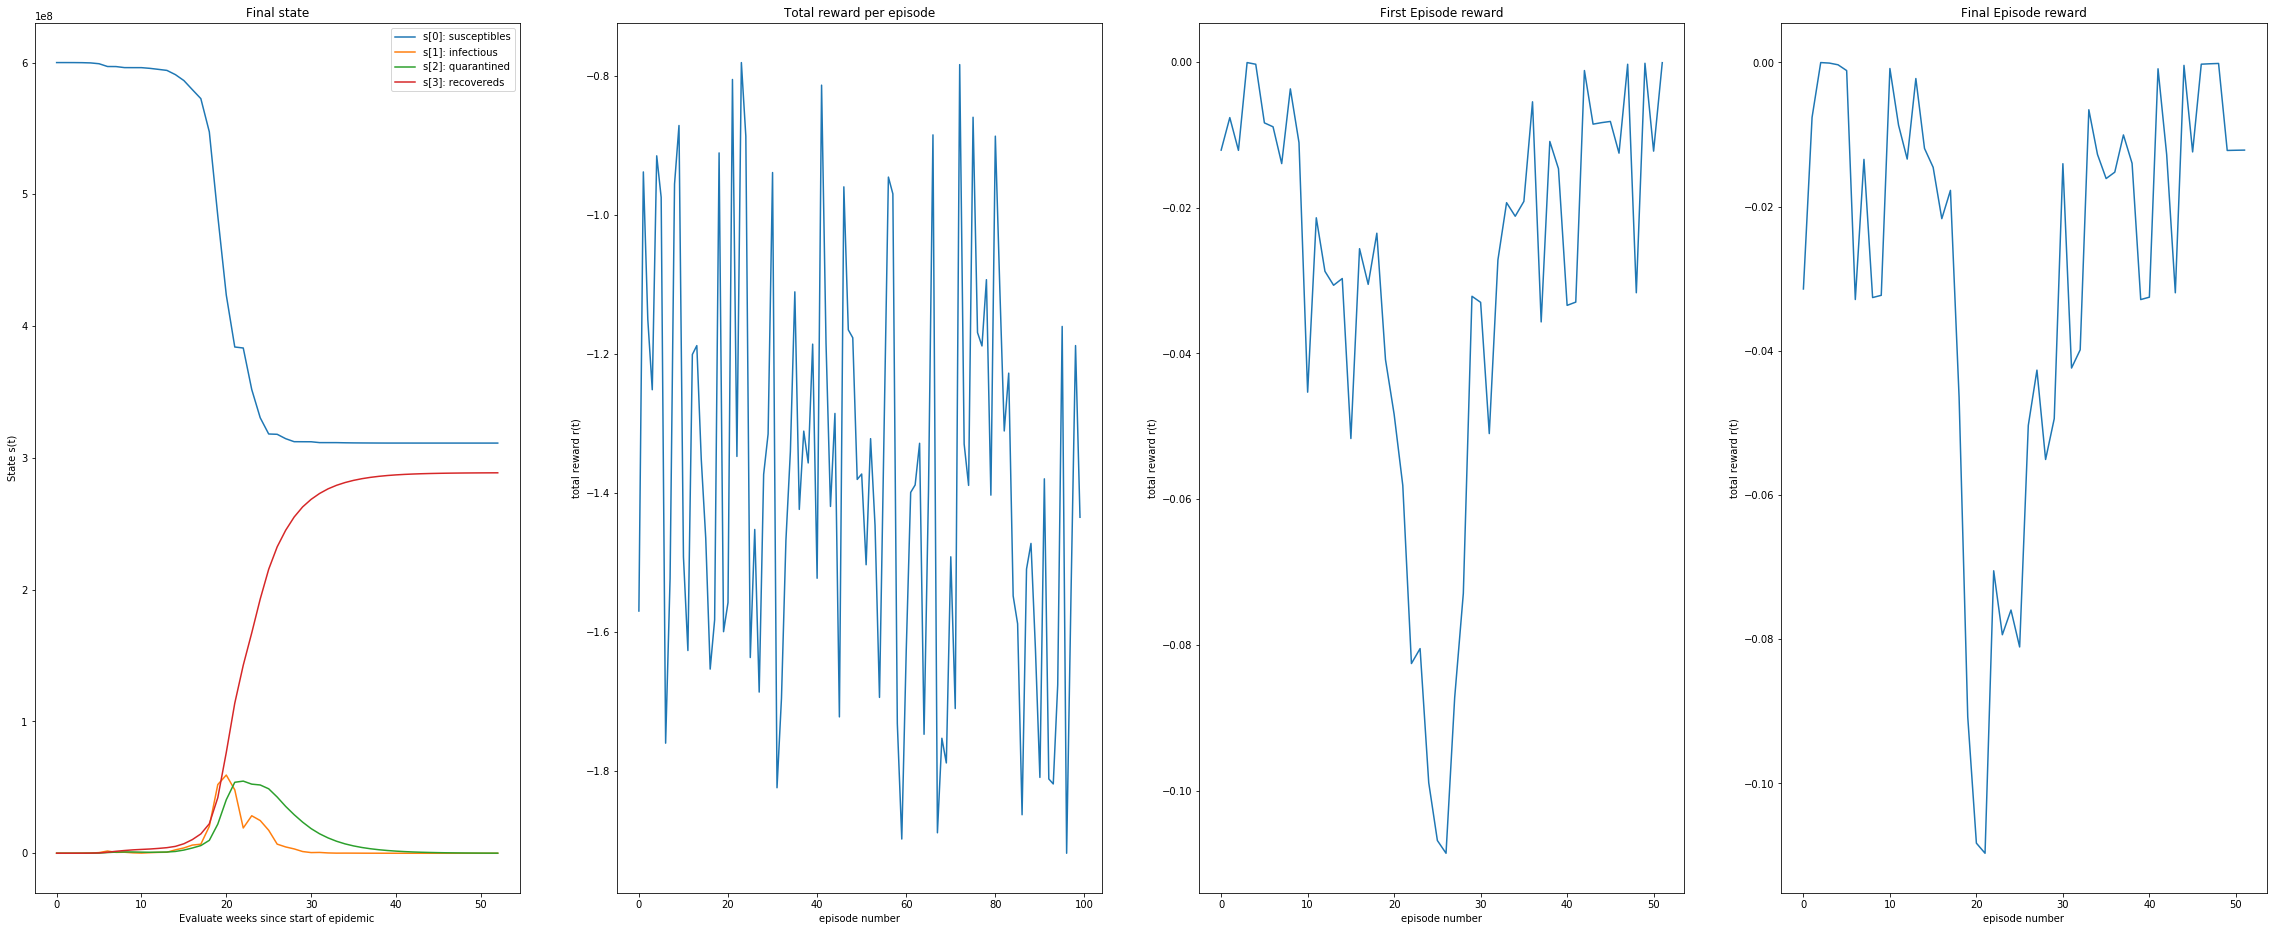

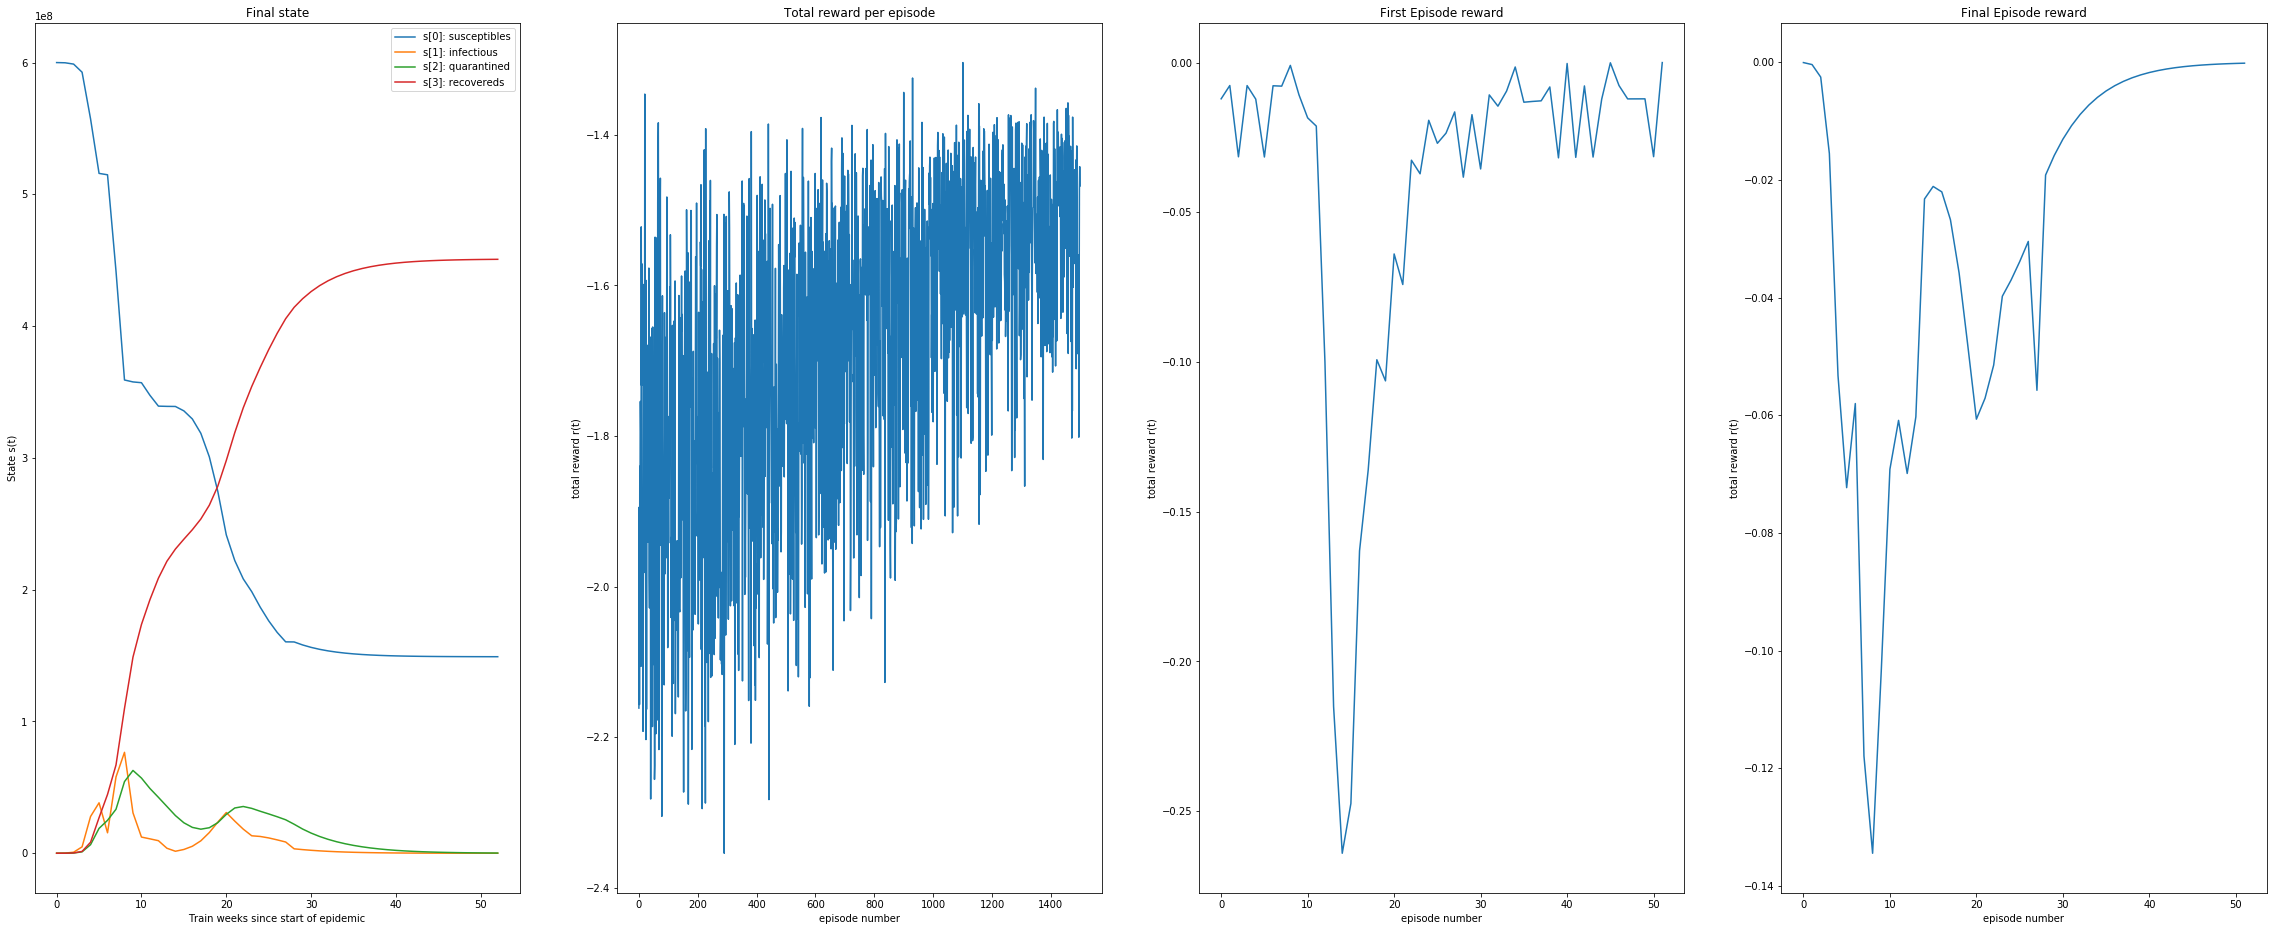

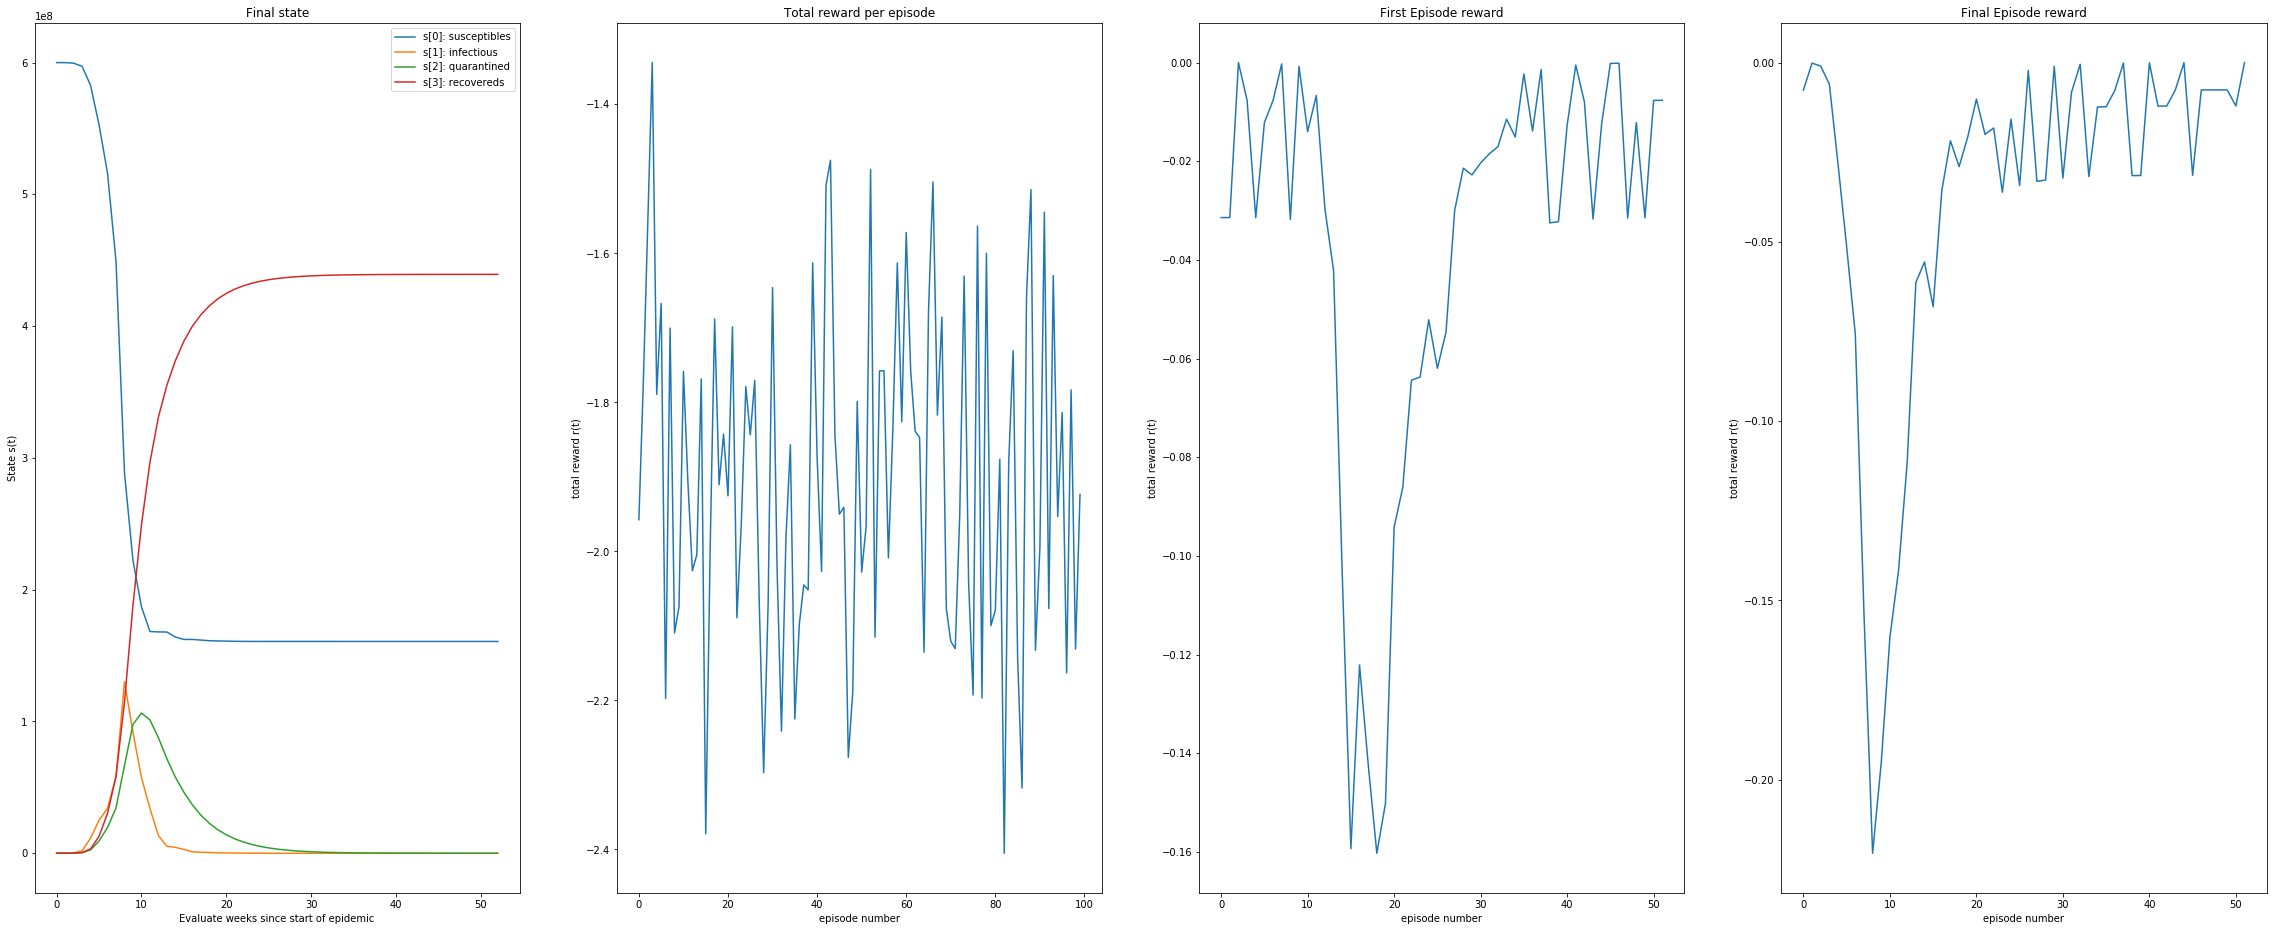

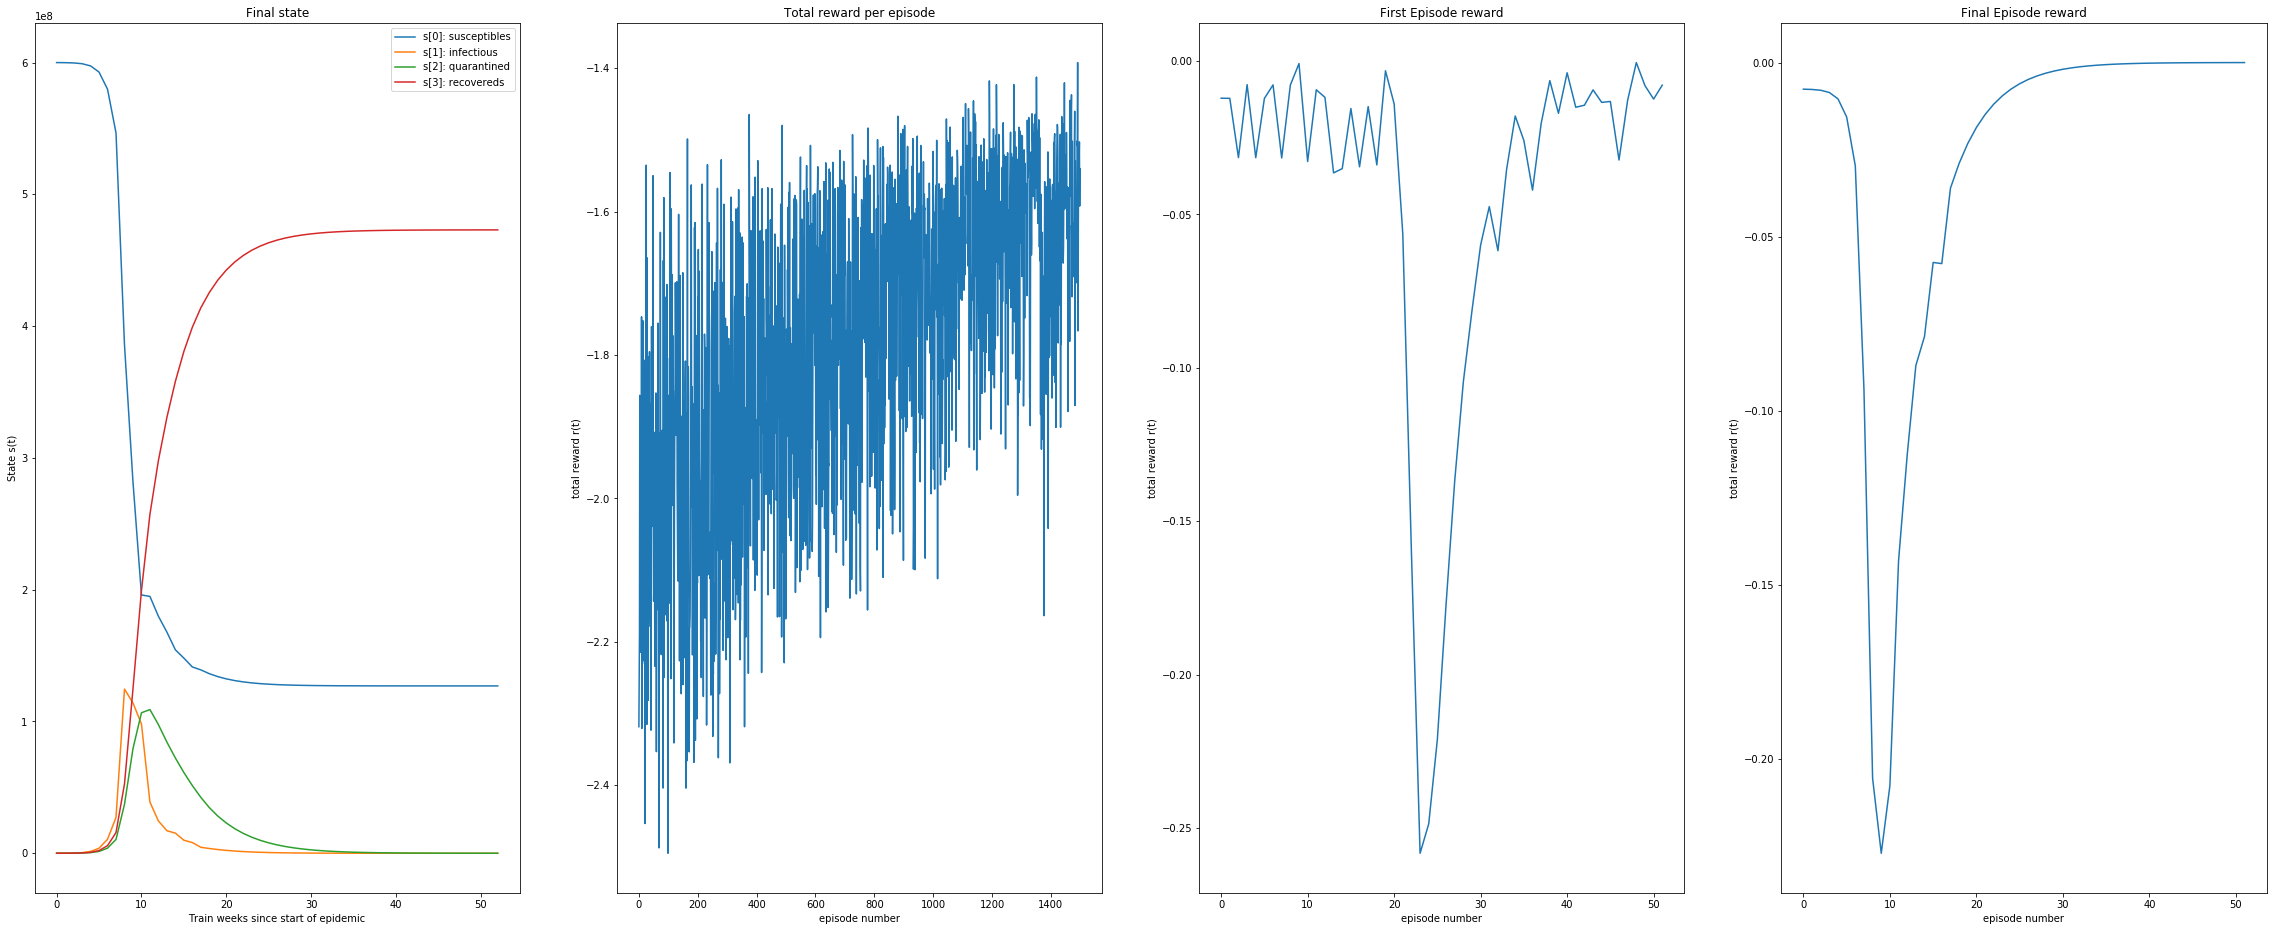

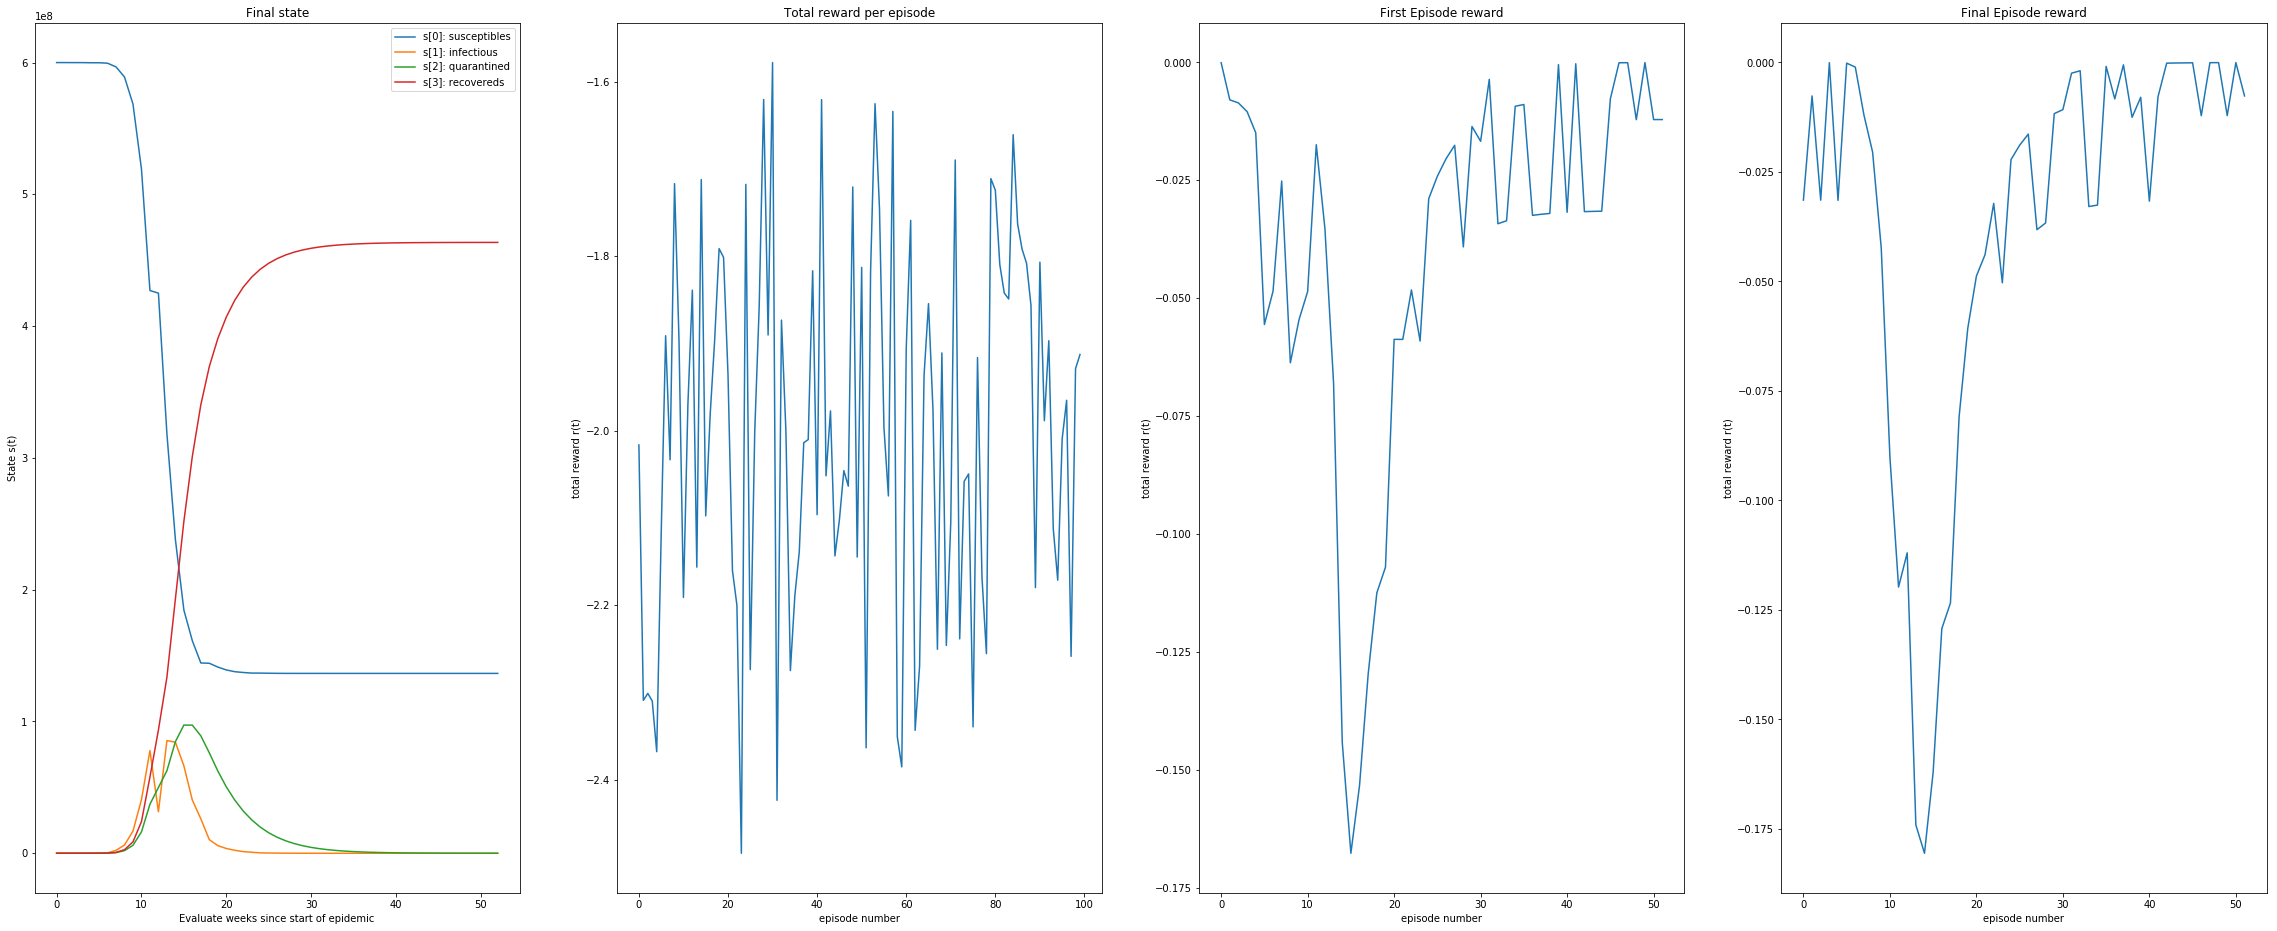

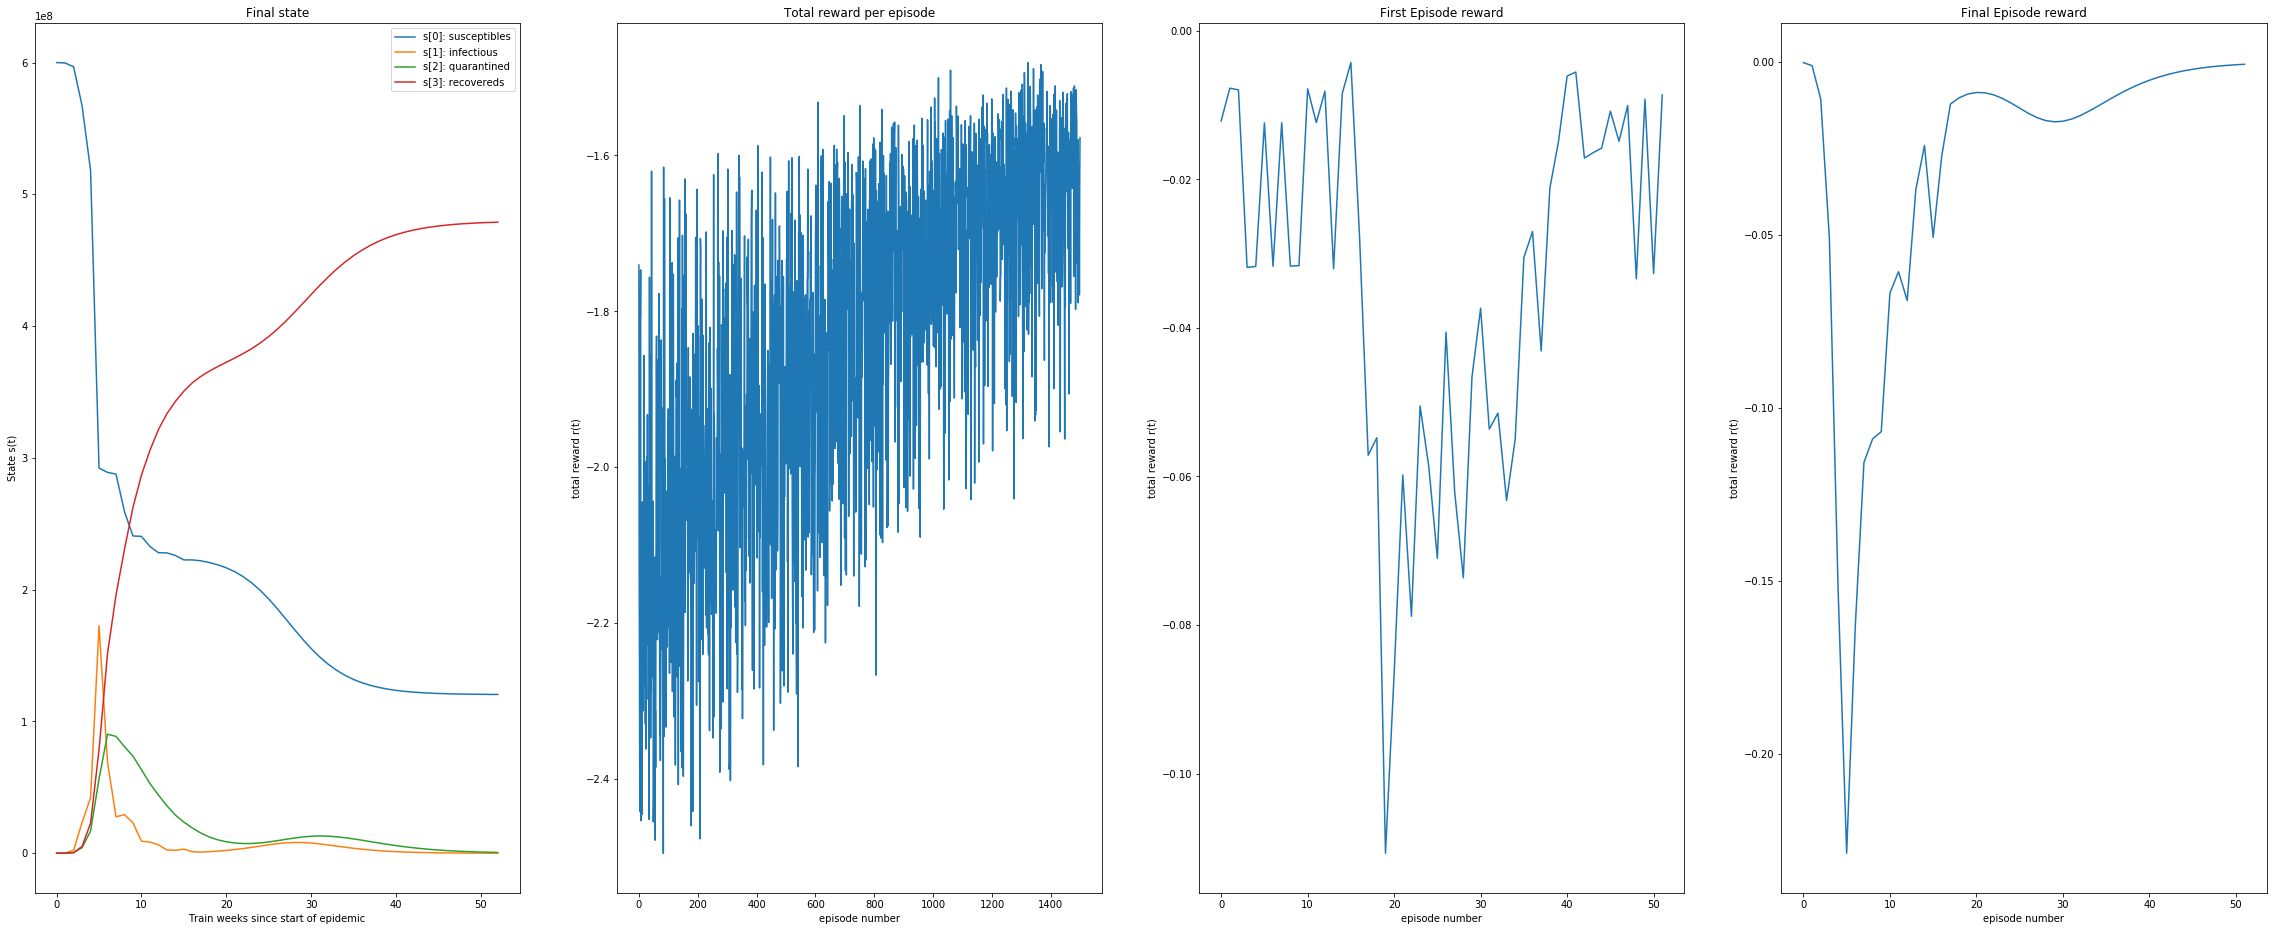

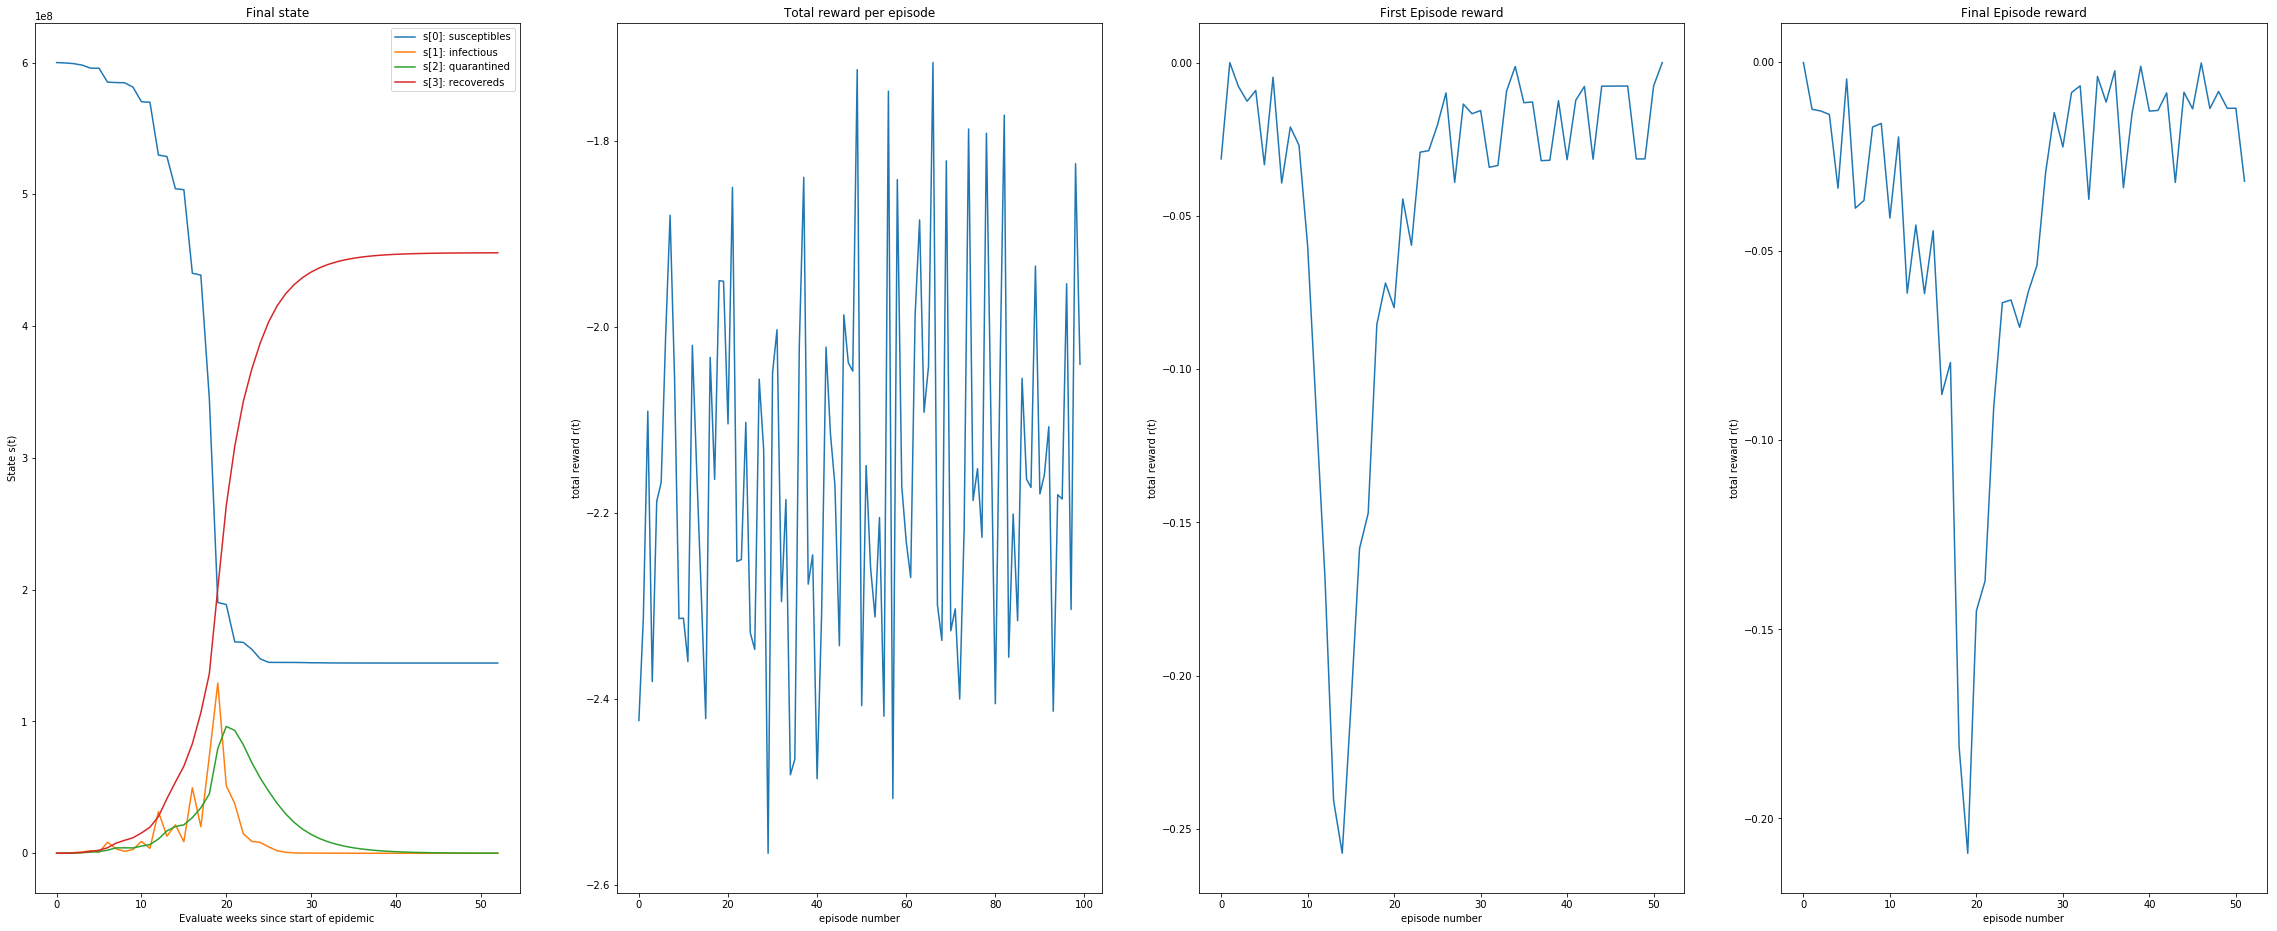

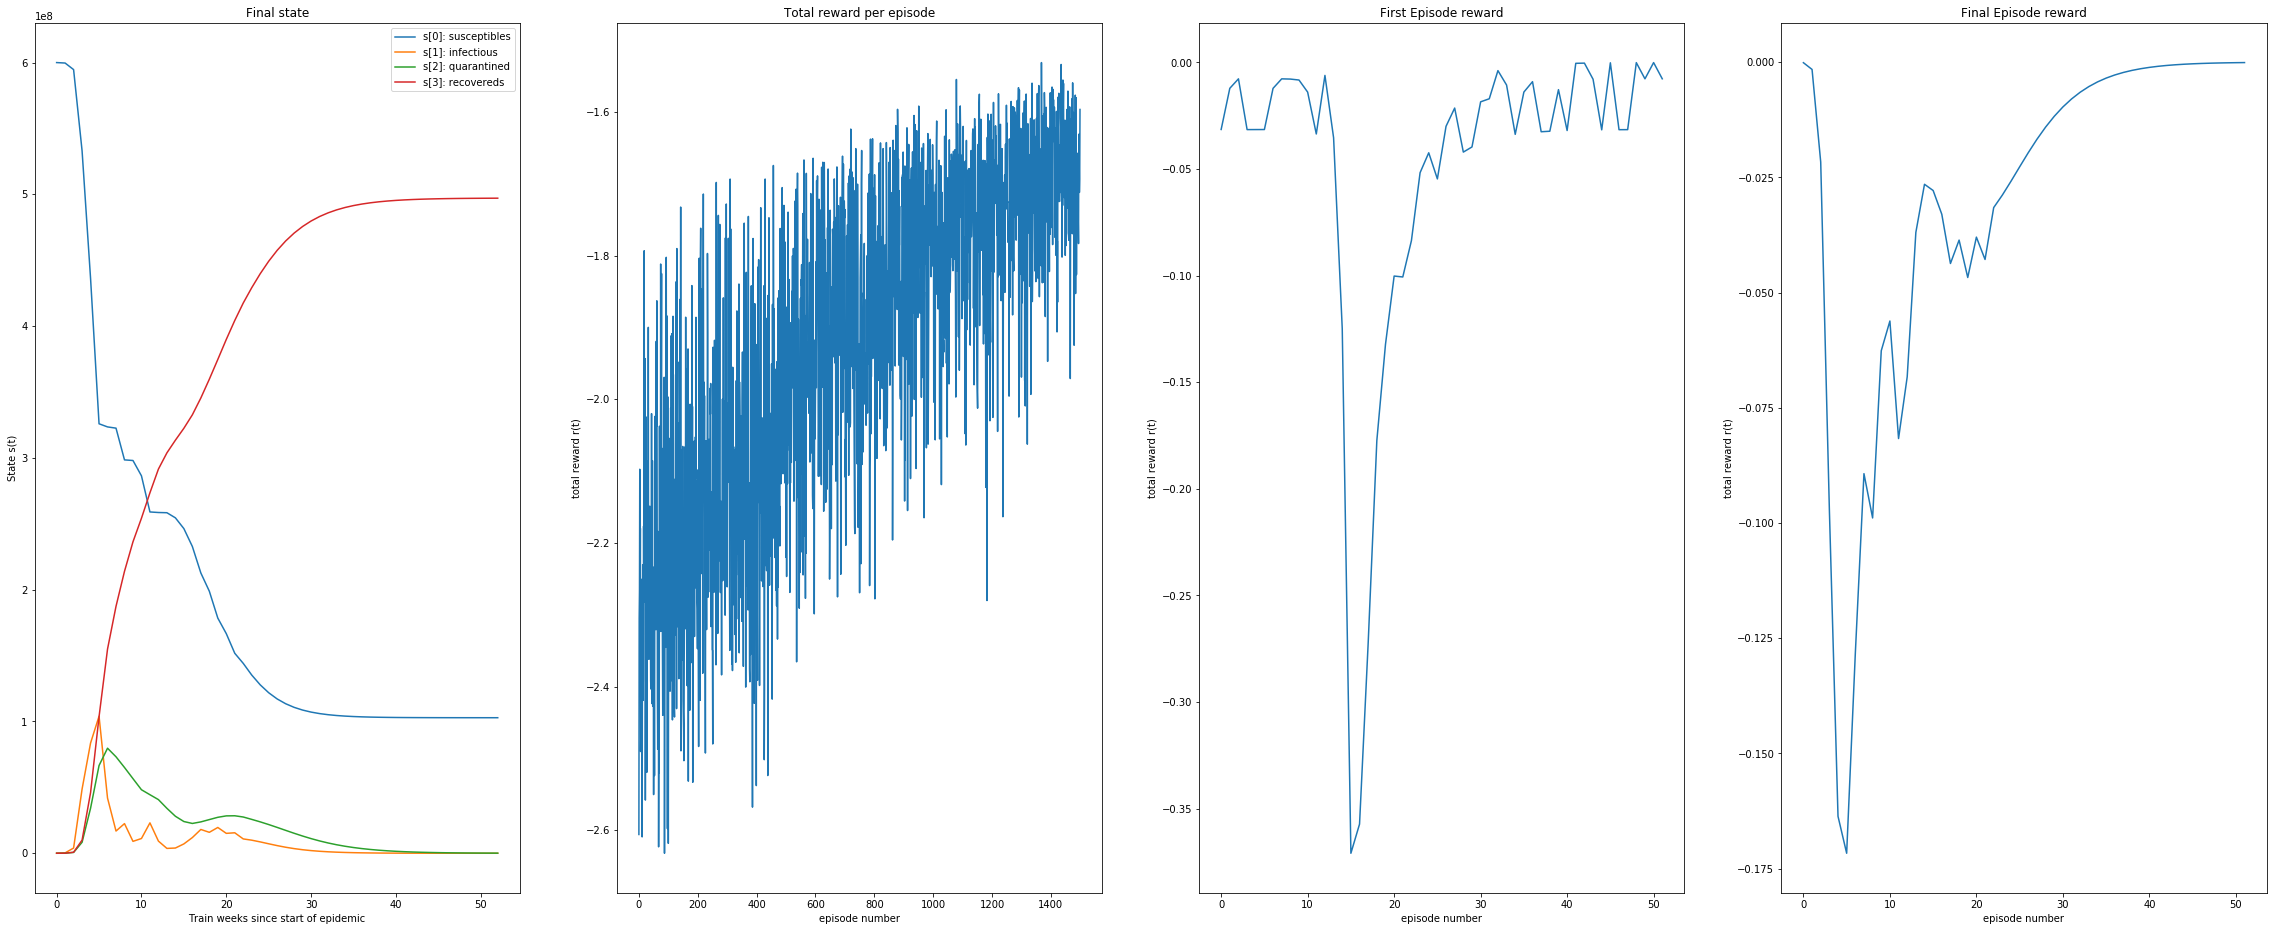

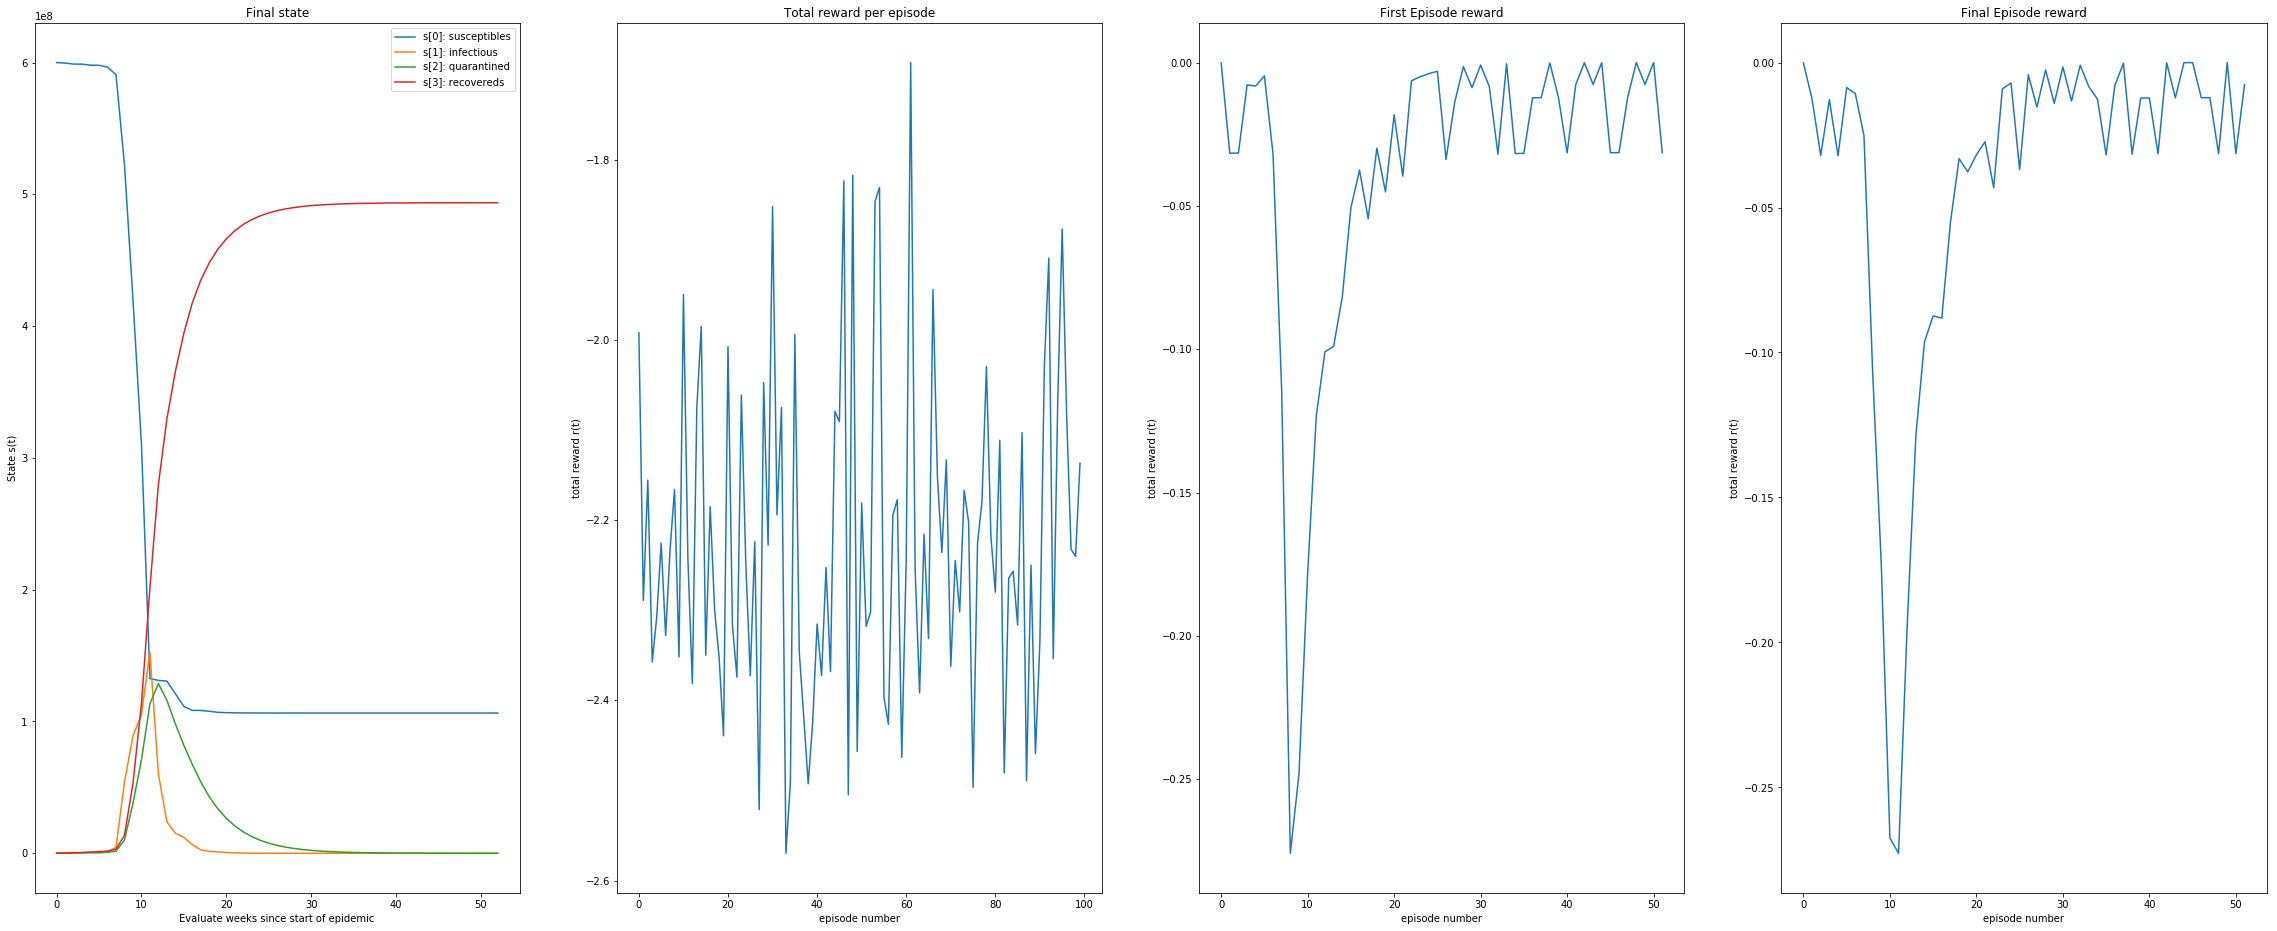

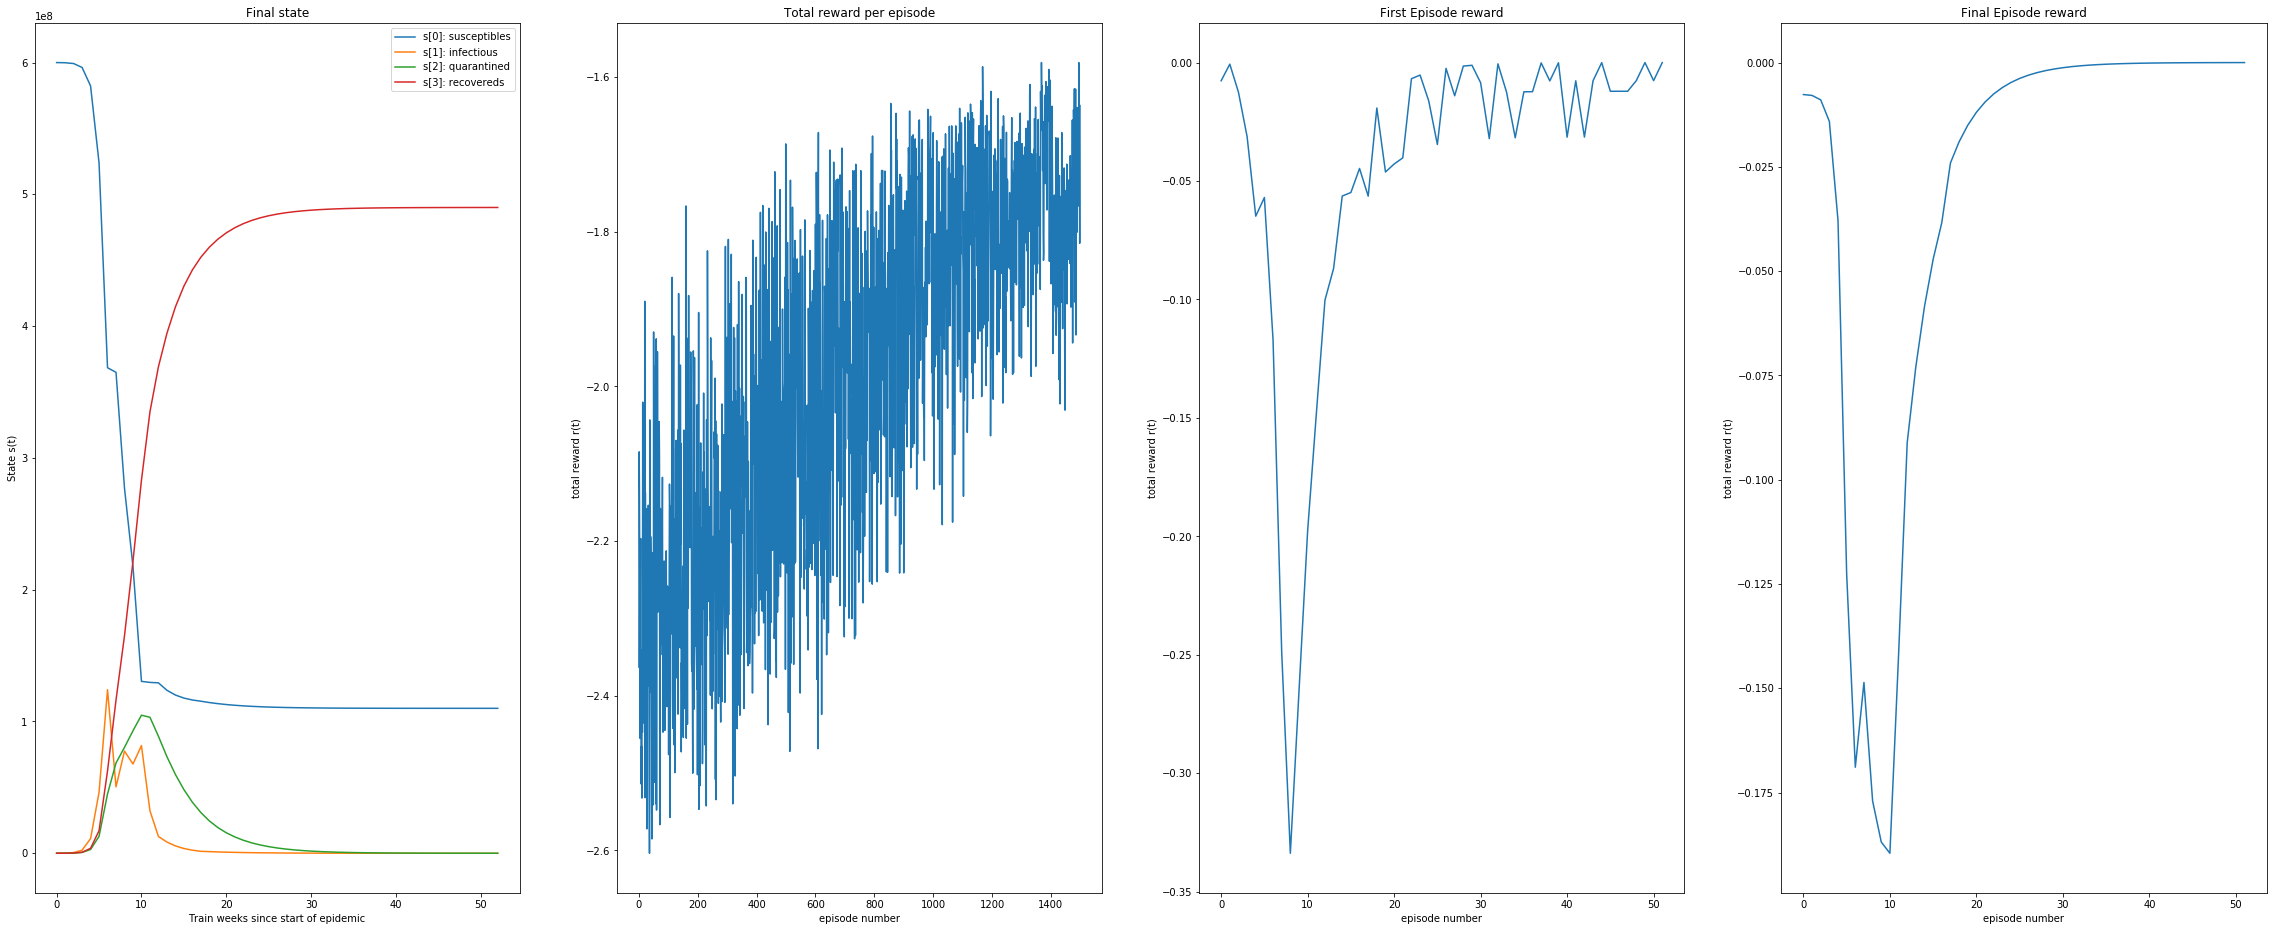

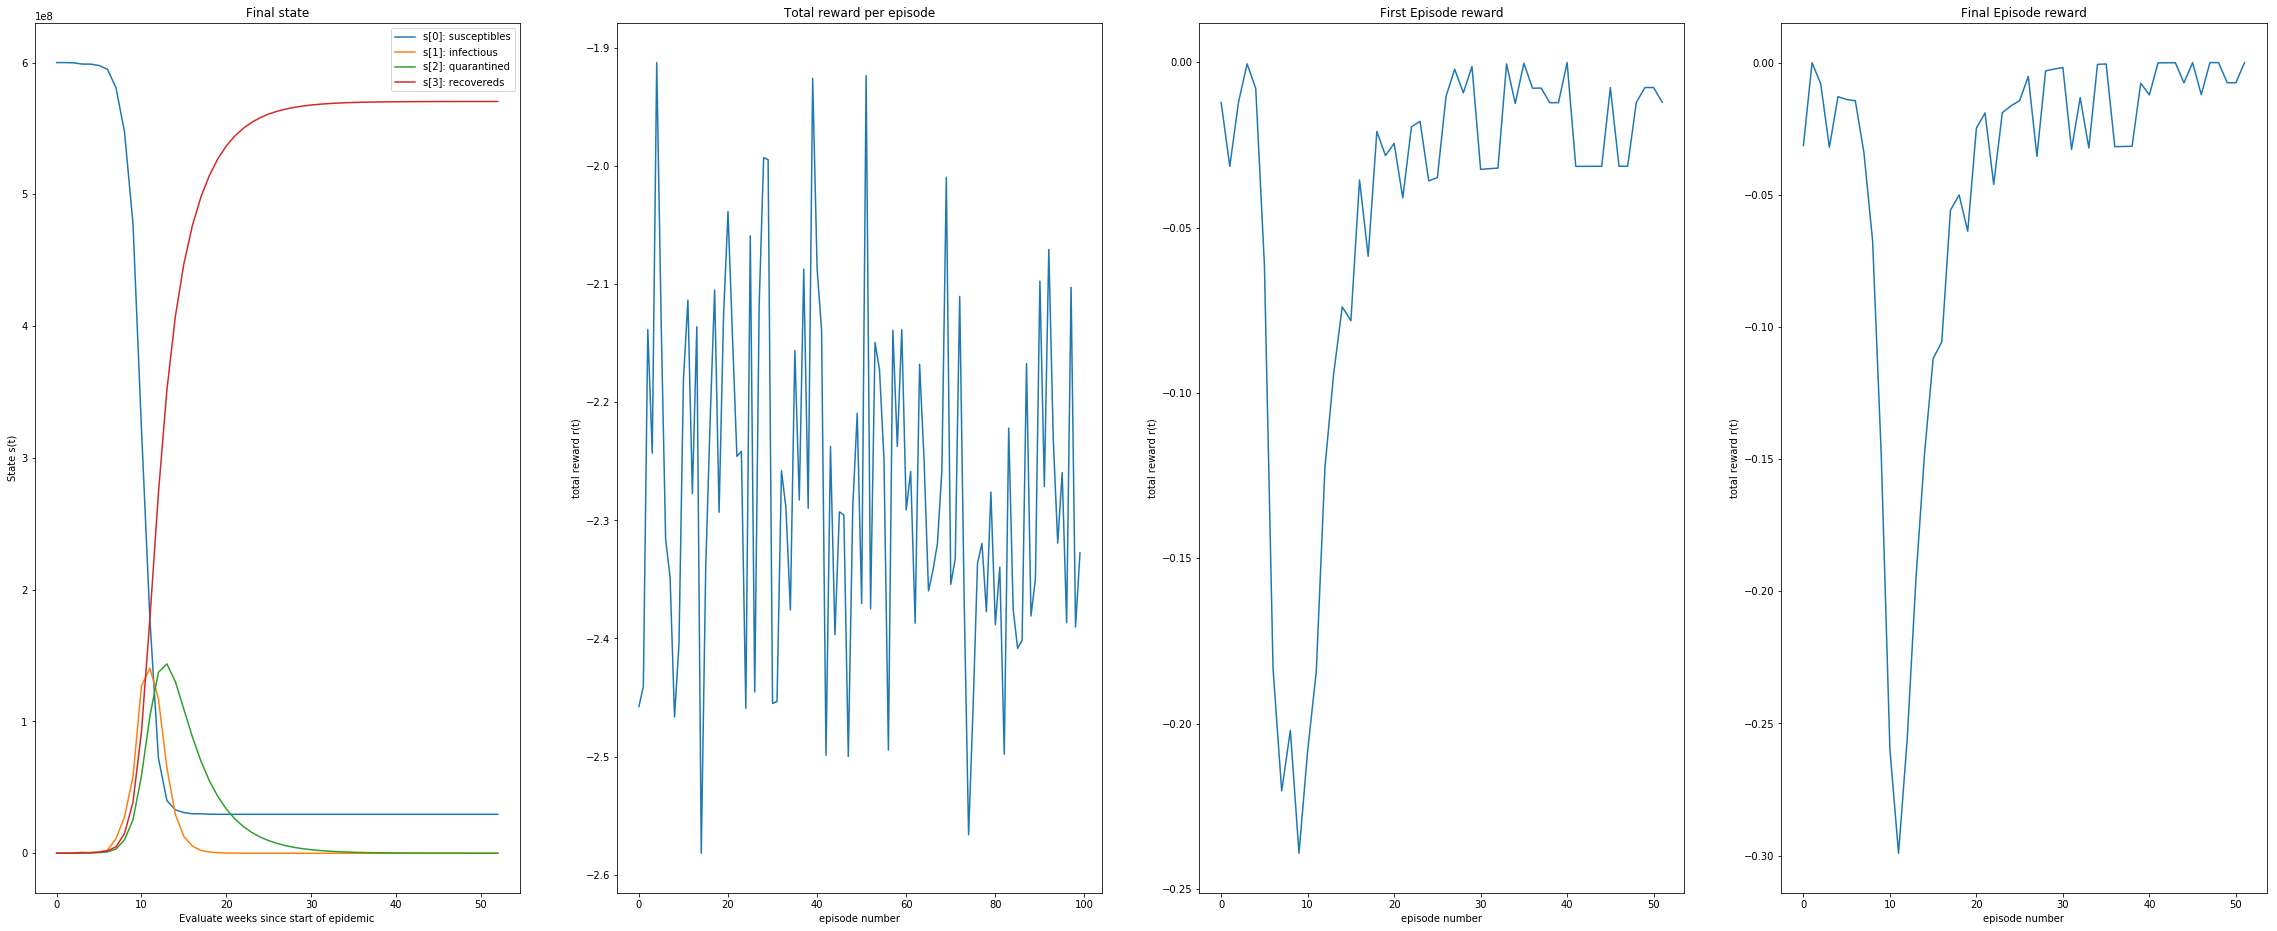

In [5]:
#change the problem id

for i in range(0,10):
    print("Problem id: " + str(i))
    print()
    env = virl.Epidemic(stochastic=False, noisy=False,problem_id=i)
    agent = QLearningAgent(env)
    
    title = "Train: problem id " + str(i) + " "
    print(title)
    states,all_rewards, all_total_rewards = agent.train()
    plot(states,agent, all_total_rewards, all_rewards,title)

    title = "Evaluate: problem id " + str(i) + " "
    print(title)
    states,all_rewards, all_total_rewards = agent.evaluate()
    plot(states,agent, all_total_rewards, all_rewards,title)

stochastic=False, noisy=False
Hyperparameter dump
----
Number Of Episodes = 1500
Print out every 30 episodes
Learning Rate = 0.25
Discount = 0.99
----
Initial Epsilon = 1
Epsilon Decrease Factor = 0.00075
----
Number of Bins to Discretise State = 20
----
Train
Evaluate
stochastic=True, noisy=False
Hyperparameter dump
----
Number Of Episodes = 1500
Print out every 30 episodes
Learning Rate = 0.25
Discount = 0.99
----
Initial Epsilon = 1
Epsilon Decrease Factor = 0.00075
----
Number of Bins to Discretise State = 20
----
Train
Evaluate
stochastic=False, noisy=True
Hyperparameter dump
----
Number Of Episodes = 1500
Print out every 30 episodes
Learning Rate = 0.25
Discount = 0.99
----
Initial Epsilon = 1
Epsilon Decrease Factor = 0.00075
----
Number of Bins to Discretise State = 20
----
Train
Evaluate
stochastic=True, noisy=True
Hyperparameter dump
----
Number Of Episodes = 1500
Print out every 30 episodes
Learning Rate = 0.25
Discount = 0.99
----
Initial Epsilon = 1
Epsilon Decrease Factor

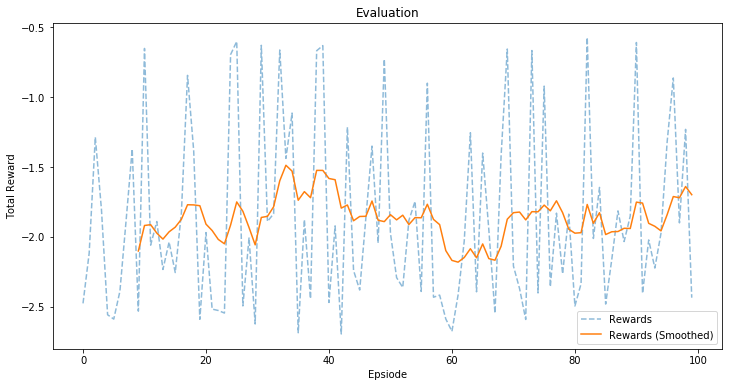

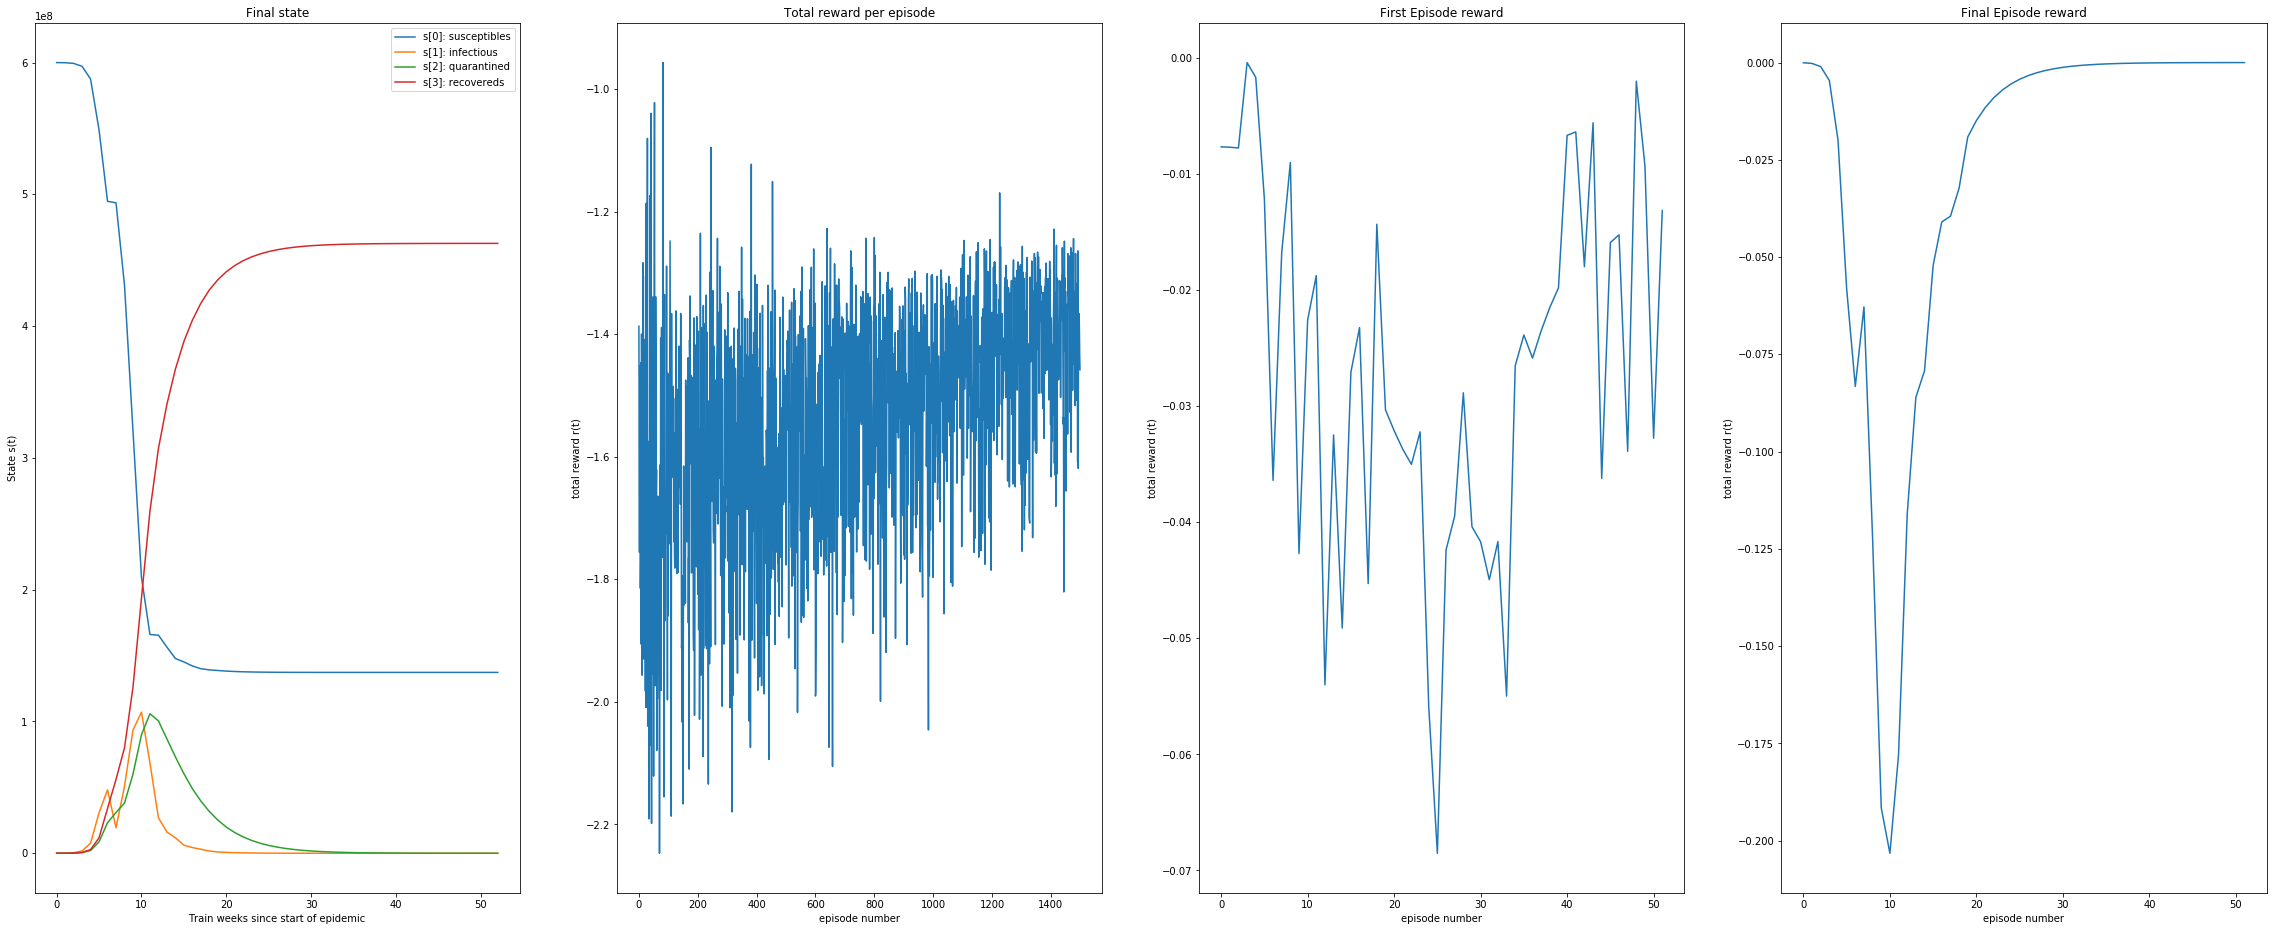

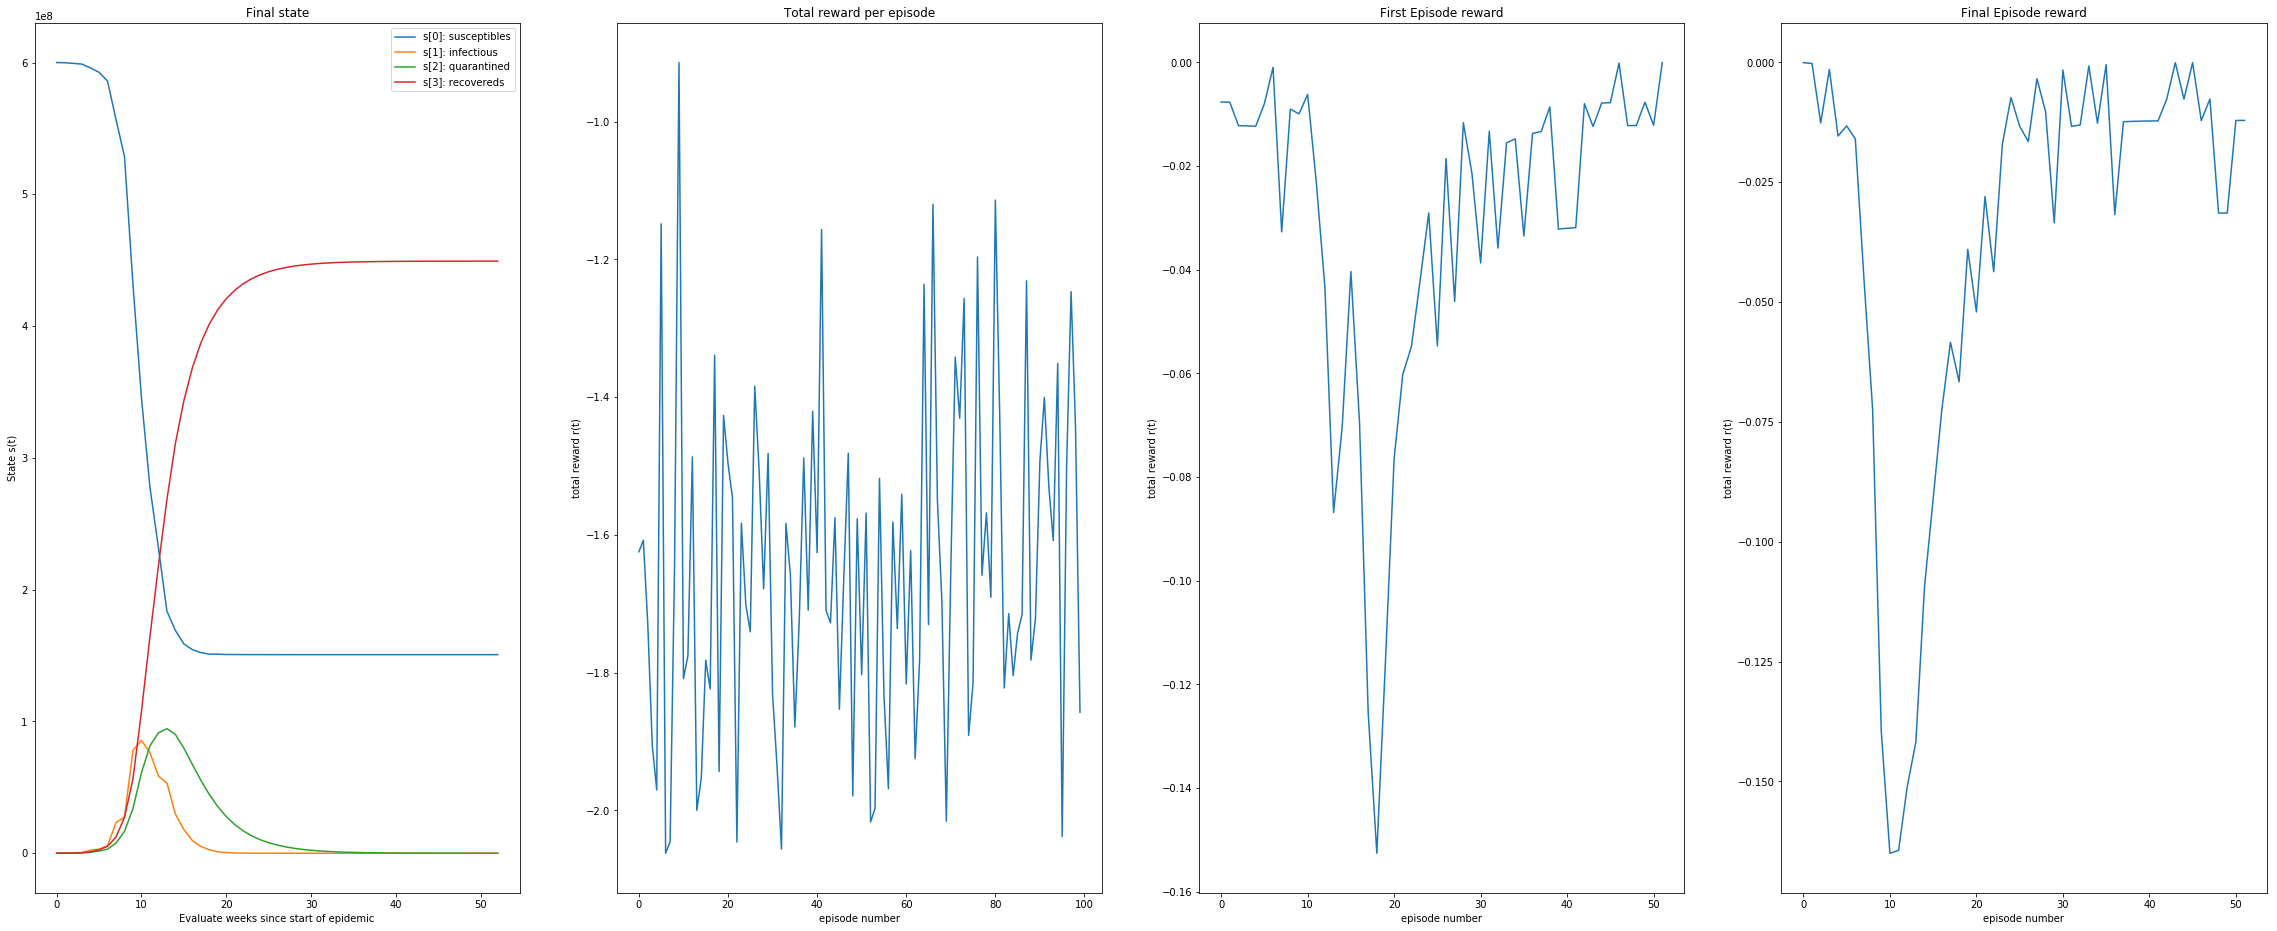

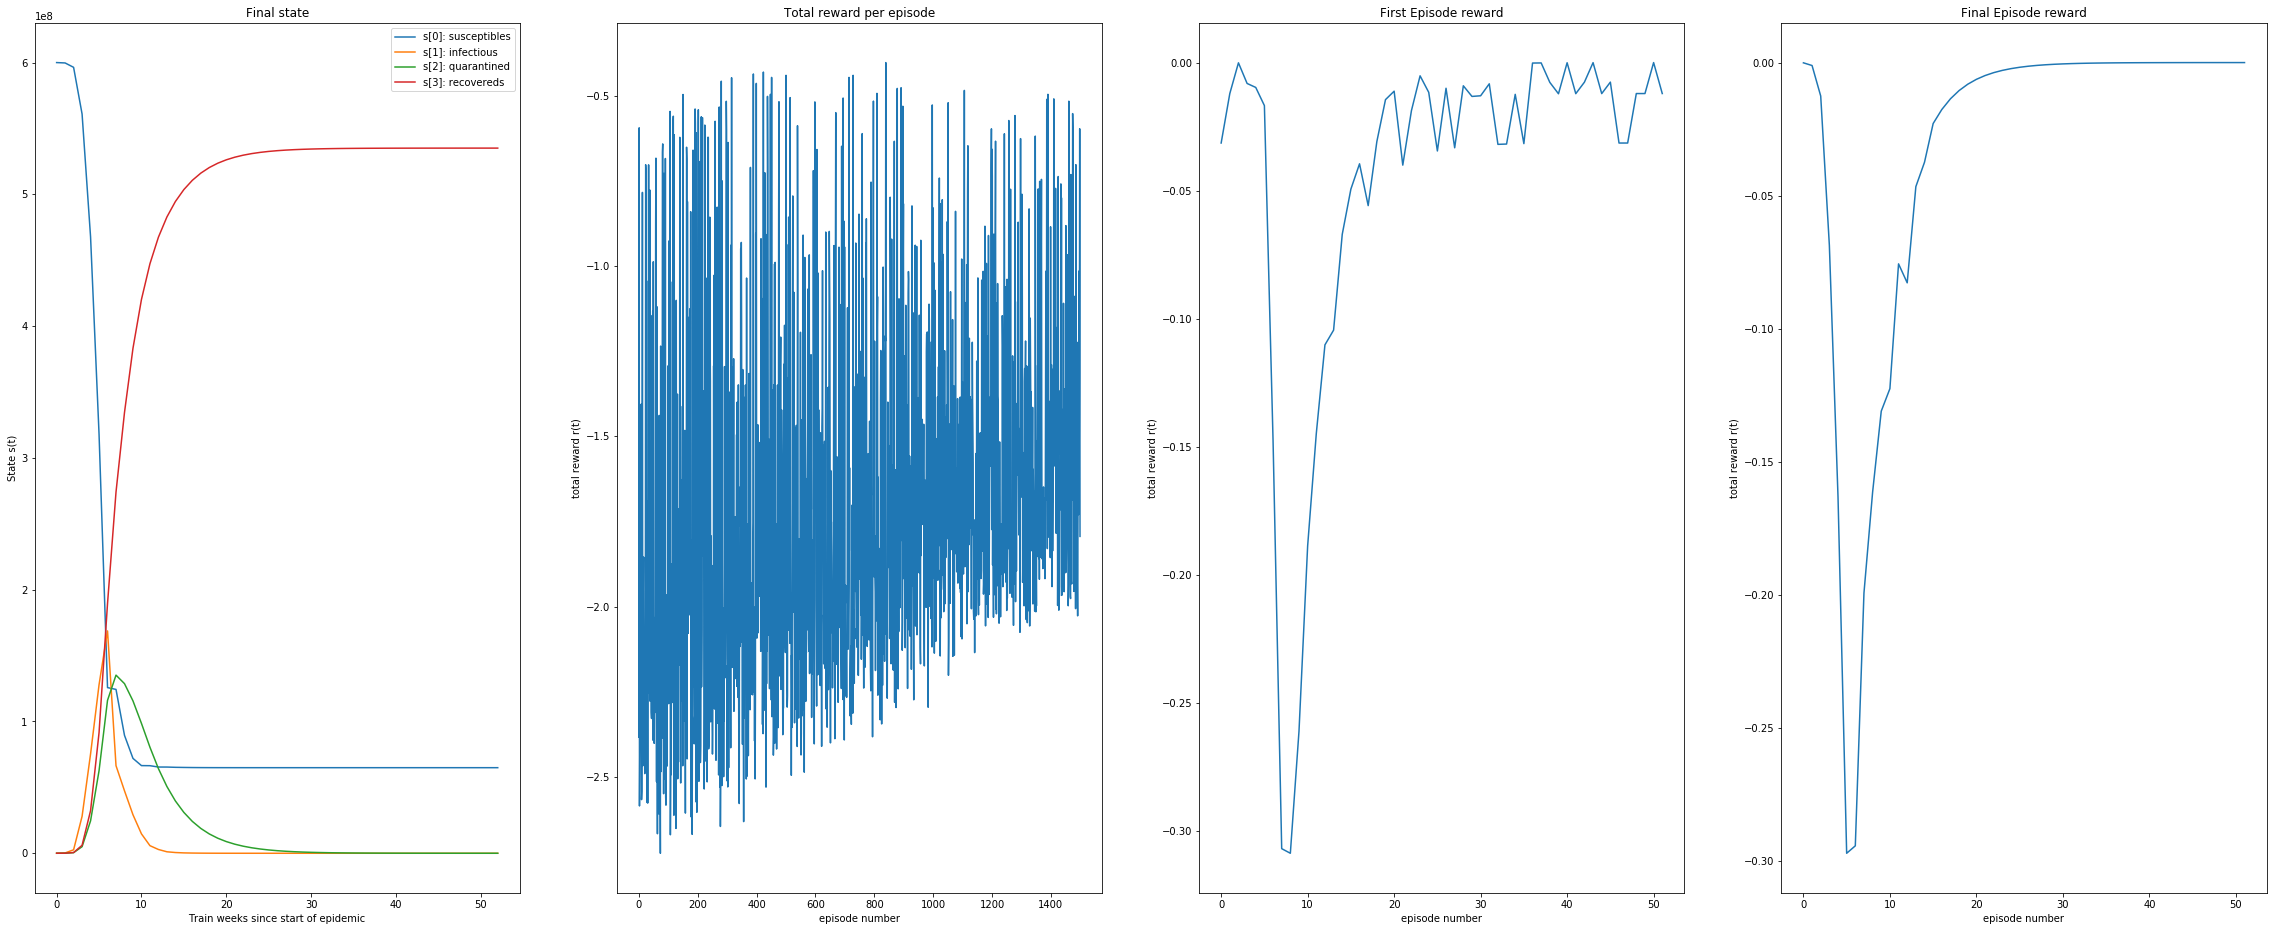

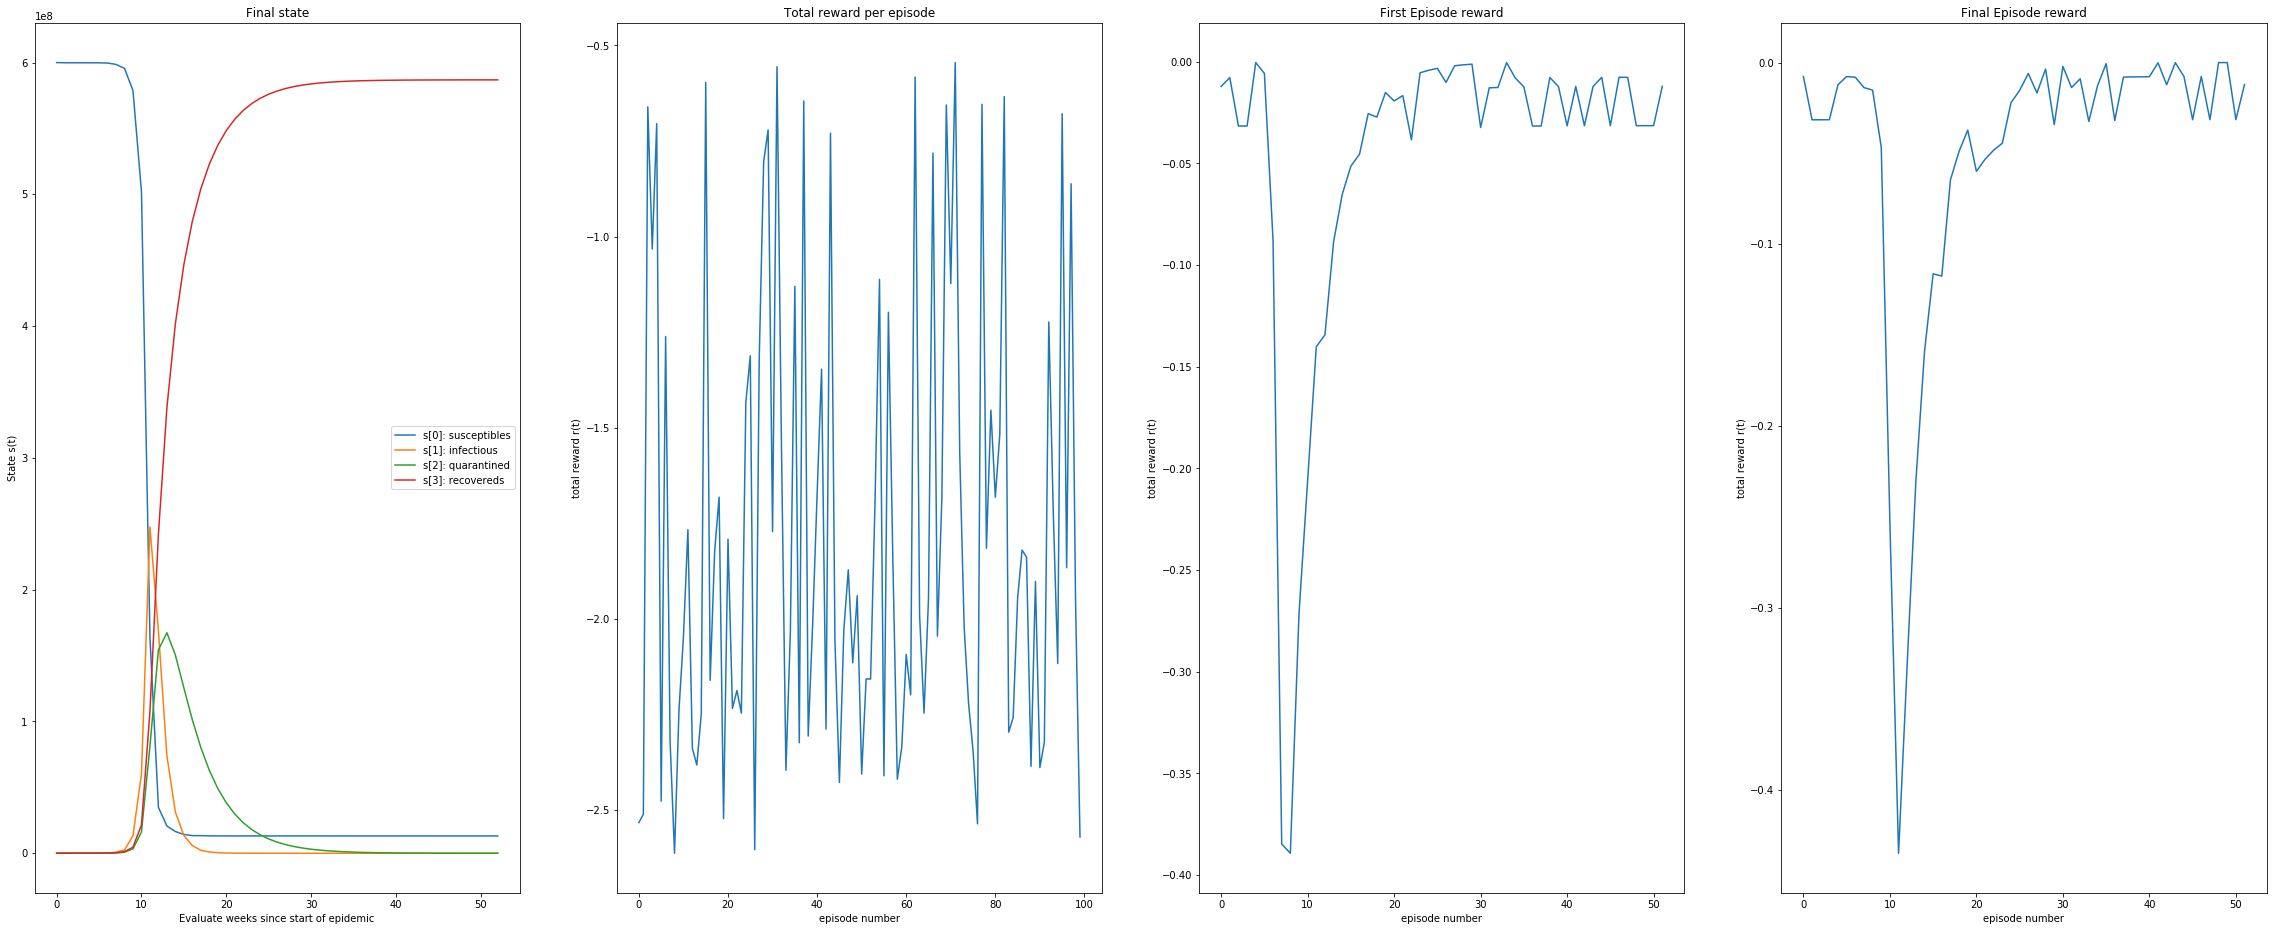

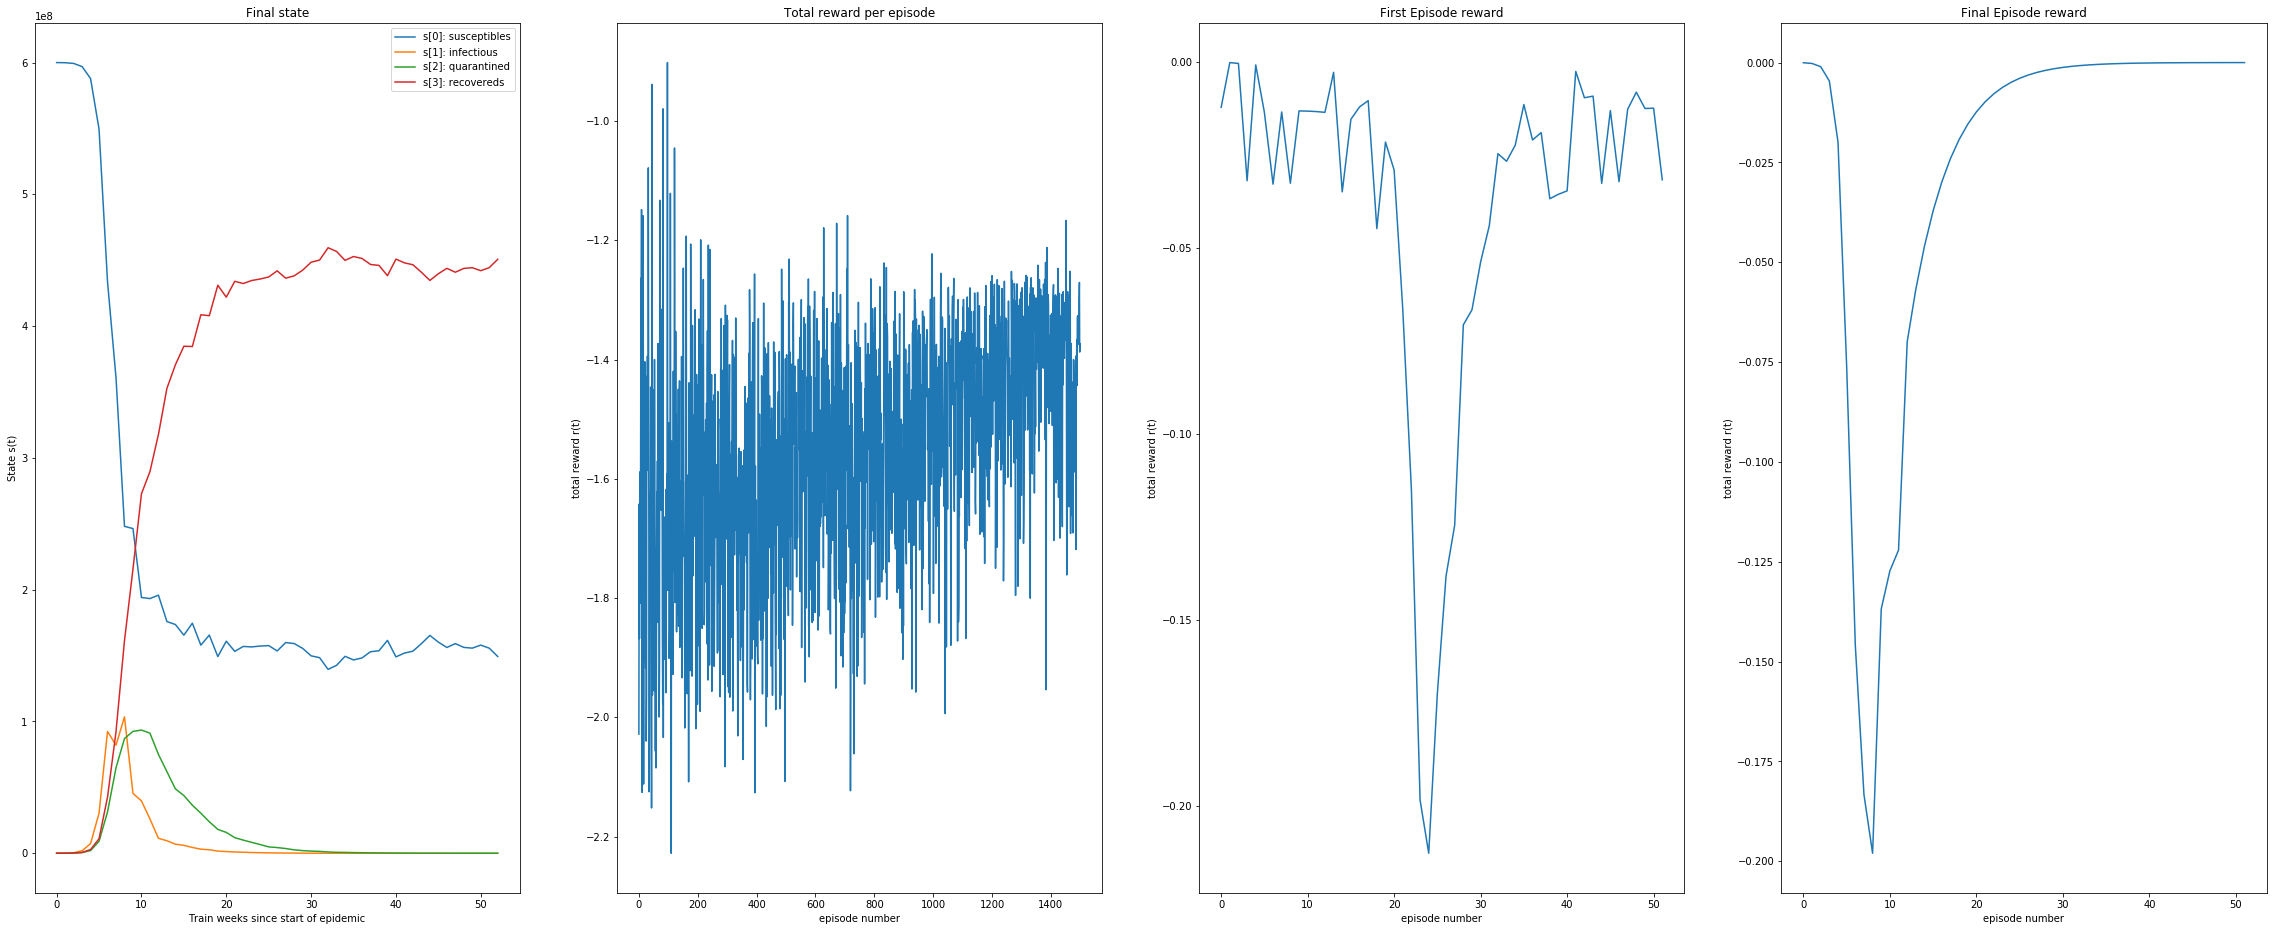

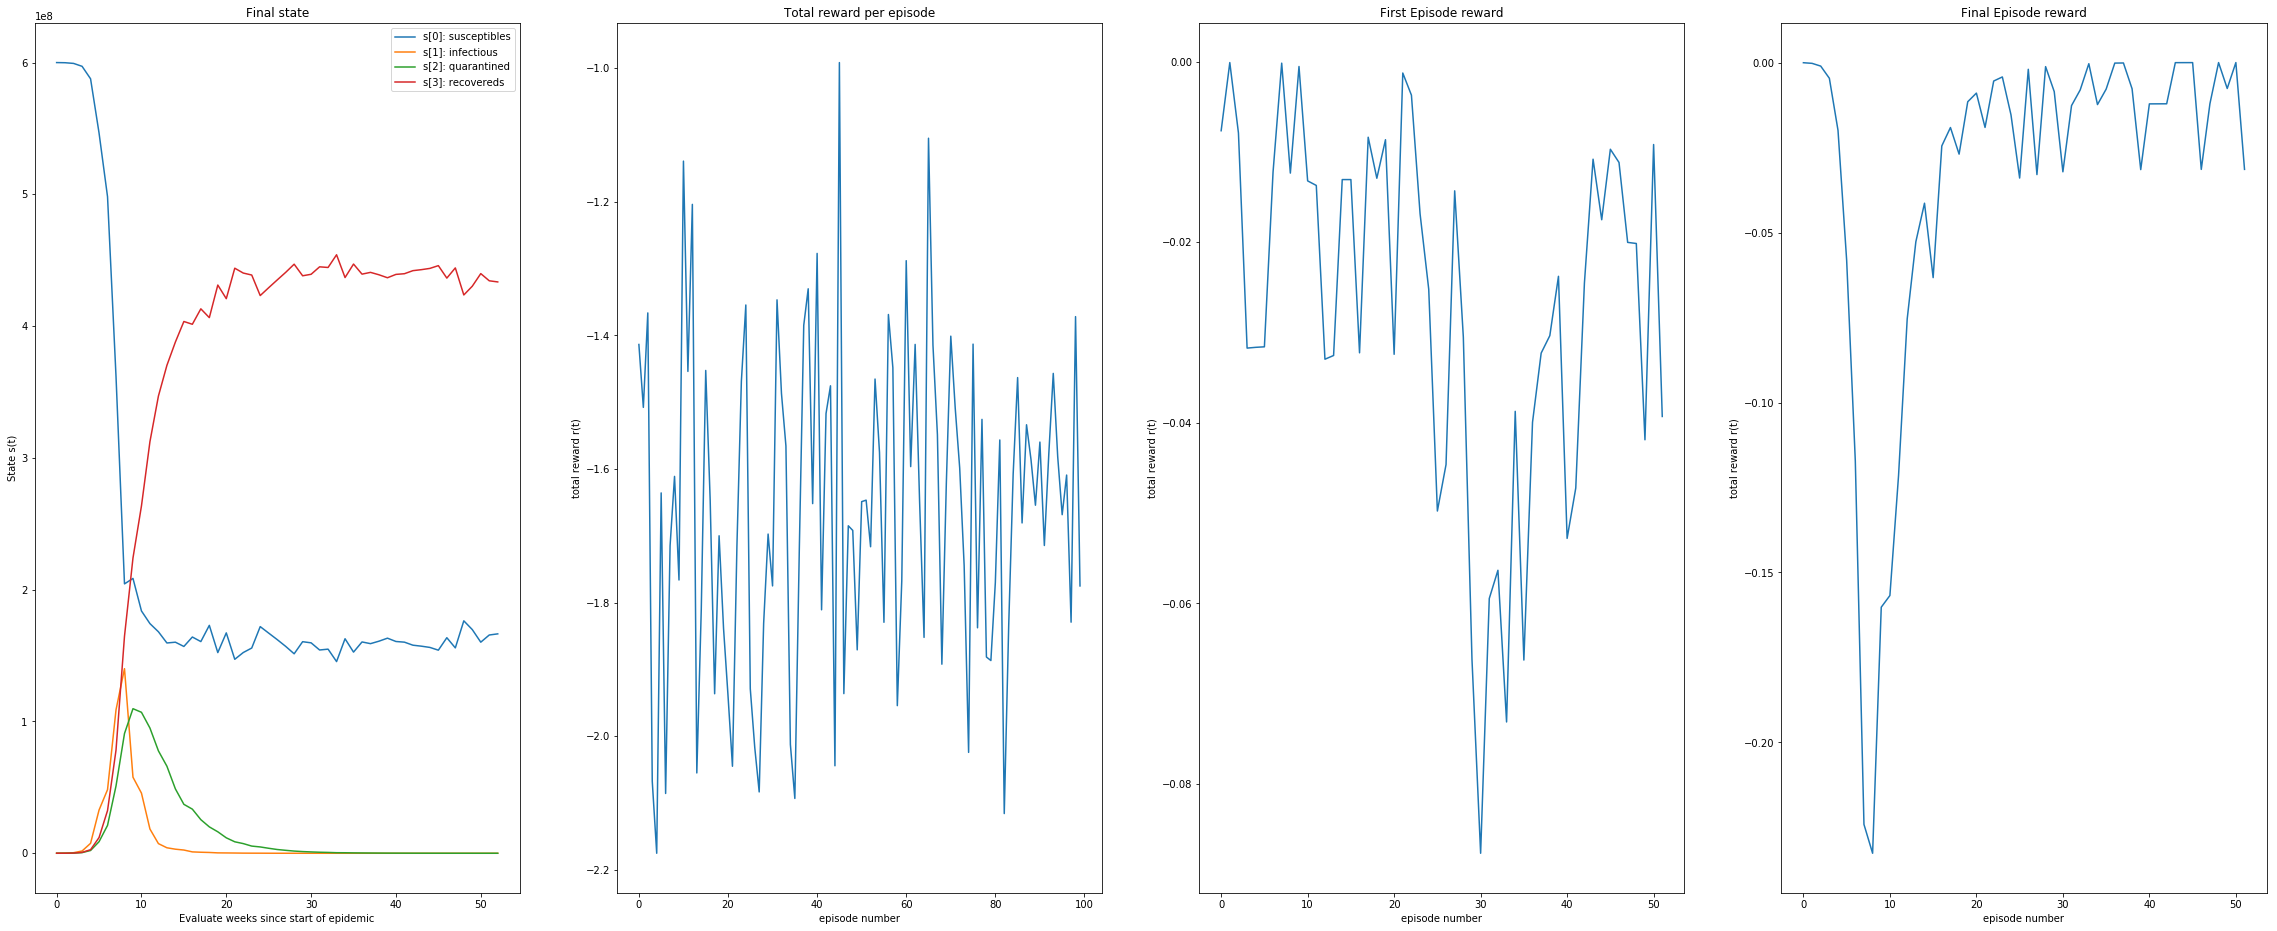

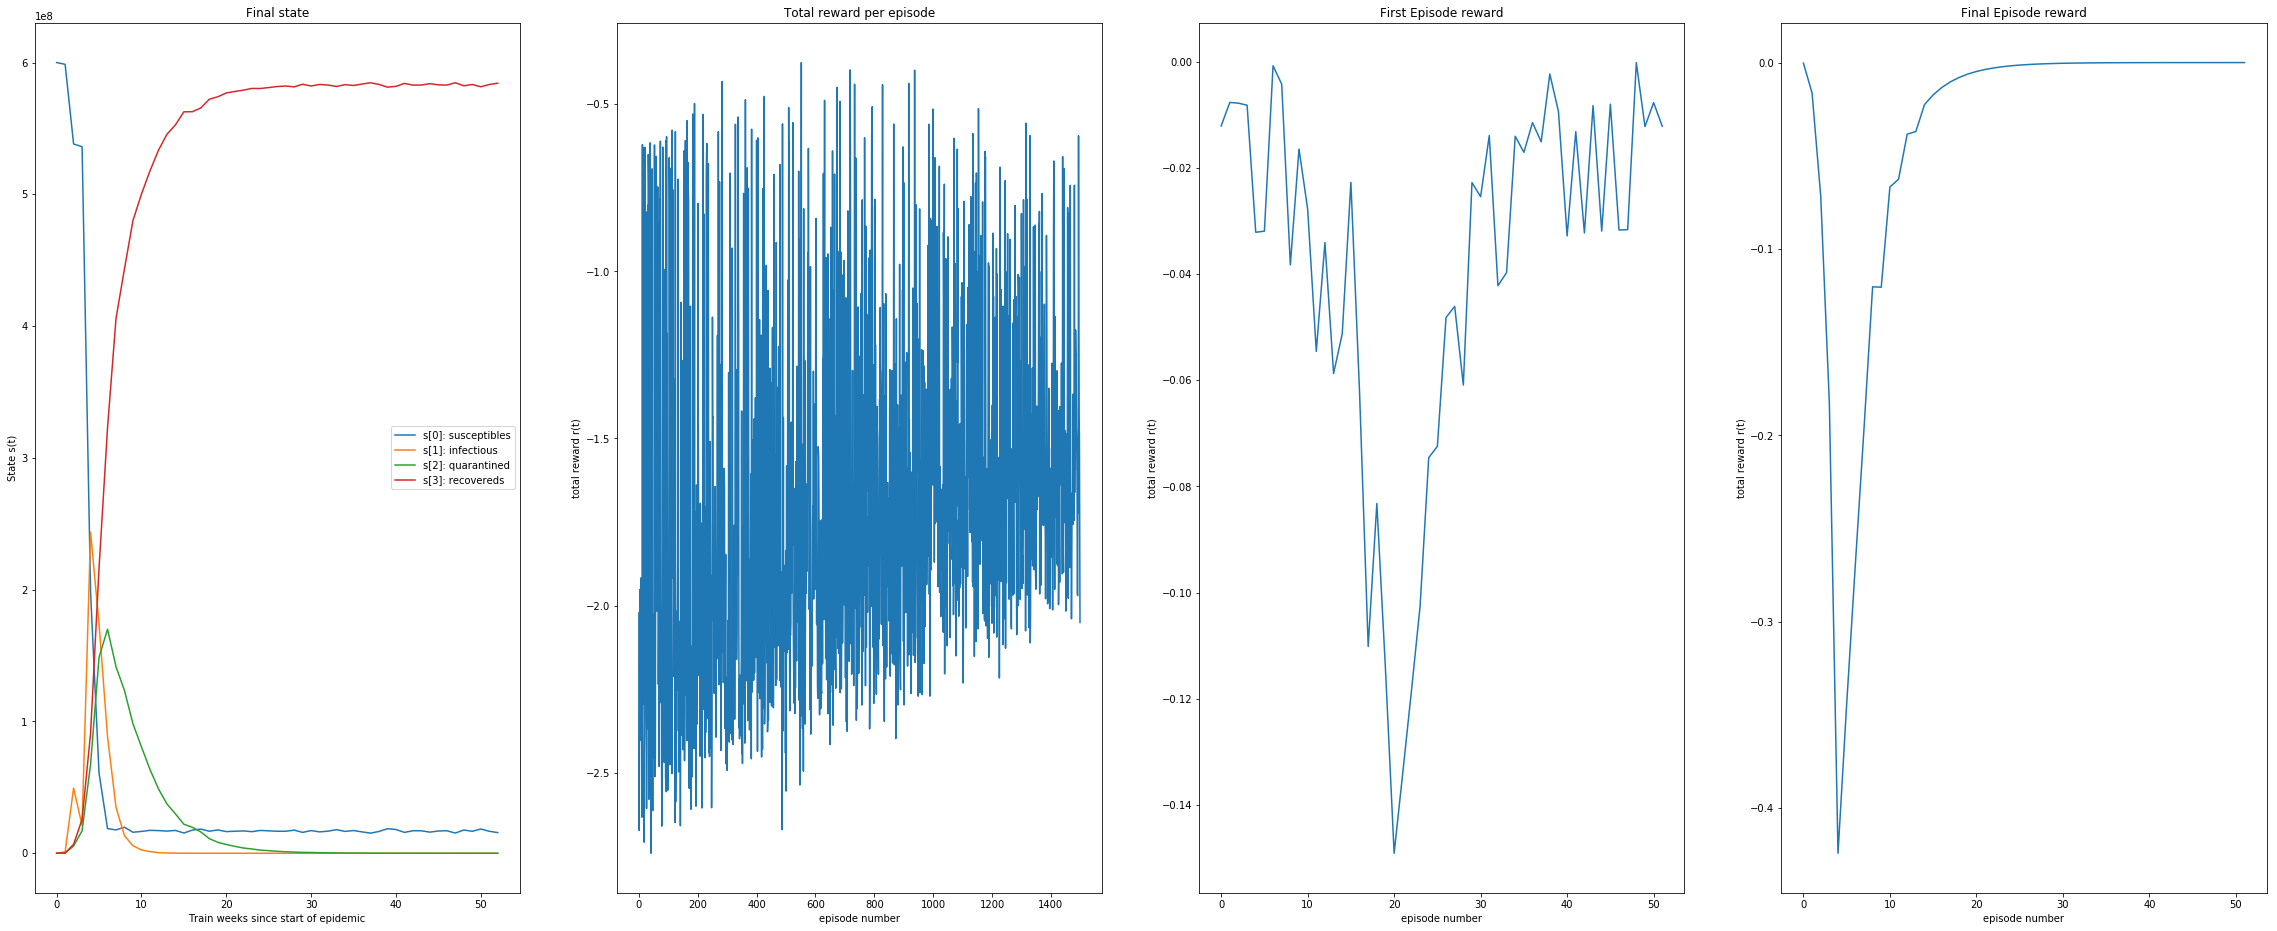

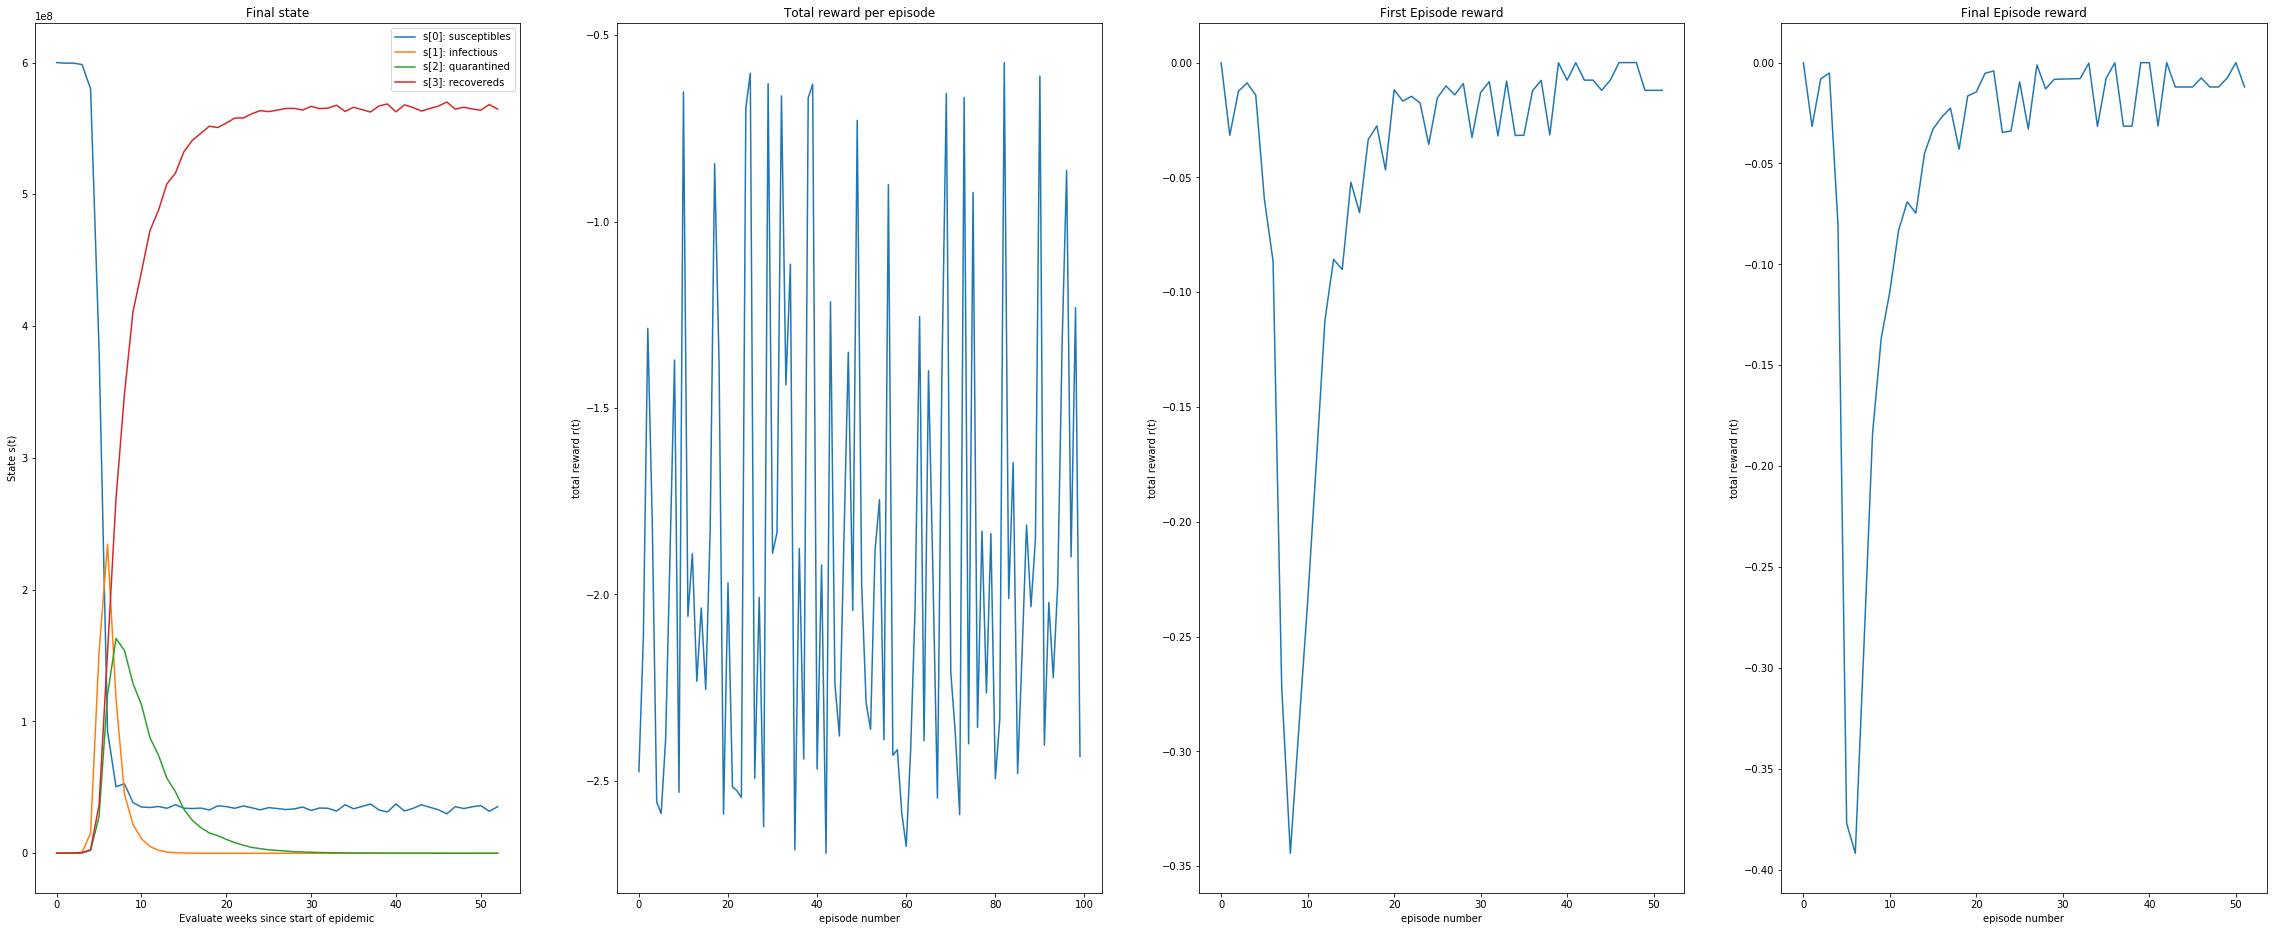

In [6]:
#chnage stochastic and noisy
stochastic_noisy = {0:virl.Epidemic(stochastic=False, noisy=False),1:virl.Epidemic(stochastic=True, noisy=False),2:virl.Epidemic(stochastic=False, noisy=True),3:virl.Epidemic(stochastic=True, noisy=True)}
stochastic_noisy_print = {0:"stochastic=False, noisy=False",1:"stochastic=True, noisy=False",2:"stochastic=False, noisy=True",3:"stochastic=True, noisy=True"}
for i in range(0,4):
    print(stochastic_noisy_print[i])
    env = stochastic_noisy[i] 
    agent = QLearningAgent(env)
    
    
    title = "Train: " stochastic_noisy_print + " "
    print(title)
    states,all_rewards, all_total_rewards = agent.train()
    plot(states,agent, all_total_rewards, all_rewards,title)

    title = "Evaluate: " stochastic_noisy_print + " "
    print(title)
    states,all_rewards, all_total_rewards = agent.evaluate()
    plot(states,agent, all_total_rewards, all_rewards,title)


In [7]:
total_reward_sd = np.std(all_total_rewards)
total_reward_mean = np.mean(all_total_rewards)
reward_sd = np.std(all_rewards)
reward_mean = np.mean(all_rewards)

print("Total reward standard deviation = " + str(total_reward_sd))
print("Total reward mean = " + str(total_reward_mean))
print("Reward standard deviation = " + str(reward_sd))
print("Rotal reward mean = " + str(reward_mean))

Total reward standard deviation = 0.6356675619445028
Total reward mean = -1.8706159887485938
Reward standard deviation = 0.05698893809039179
Rotal reward mean = -0.03597338439901142


## Evaluation

Eval here